<div class="alert alert-block alert-info" style="text-align:center" justify-content:center;>
   <h1 style="font-size: 24px; text-align:center;">Project 2: The Tacoma Narrows Bridge</h1>
</div>

**Project Team:**
- `Ankit Kumar Aggarwal`

- `Avinash Rajaraman Swaminathan`

- `Sayed Raheel Hussain`

# Ordinary Differential Equations

## Systems of Ordinary Differential Equations

###  Defining Different Solver Functions for ODEs

In [102]:
#importing important Libraries
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

In [103]:
#Define numpy functions and constants

pi = np.pi
exp = np.exp
sqrt = np.sqrt
sin = np.sin
cos = np.cos

## Test key functions

### Simpler differential equation to check our solver 

In [104]:
#Set the interval
a, b = 0, 1

#Set the initial conditions
y_0 = (0, 1)

In [105]:
# Define the function f(t,y) for the system of differential equations
def f(t, y):
    y1, y2 = y
    return np.array([y2*y2 - 2*y1, y1 - y2 - t*y2*y2])

# Define the exact solution function for comparison
def exact_sol(t):
    return np.array([t*exp(-2*t), exp(-t)])

Function Trapezoid_method
=====================

__Trapezoid Method__: The Trapezoid Method is a numerical integration method that approximates the solution of an initial value problem by computing the left and right slopes and taking their average to make a single step forward.


Given a d-dimensional system of ODEs y'=f(t,y), and an initial condition y(a)=y_0, this function computes the solution of the initial value problem

y'   = f(t,y)
y(a) = y_0

on the interval [a,b] using Trapezoid Method. The step size h is provided by the caller.

The function returns the numerical solution w(t), along with the n equispaced points at which the solution is computed.

Parameters
----------

    - f: vector field of arbitrary dimension d.
    - a,b: initial and final time of the solution.
    - h: step size.
    - y_0: initial condition (must have dimension d).

Returns
-------

    - t: points in time at which the solution is computed (array of dimension n).
    - w: value of the numerical (approximate) solution at times t (array of dimension n).

In [106]:
def Trapezoid_method(f, a, b, h, y_0):
    n = int((b - a)/h)
    d = len(y_0)
    
    t = np.linspace(a, b, n+1)
    w = np.zeros((d, n+1))
    w[:, 0] = y_0
    
    for i in range(n):
        w[:,i+1]= w[:,i]+h/2*(f(t[i],w[:,i]) + f(t[i]+h,w[:,i]+h*f(t[i],w[:,i])))
        
    return t, w

Function Euler_method
=====================

__Euler's Method__ - Euler's method approximates the solution of an ordinary differential equation by taking small steps in the direction of the tangent line at each point.

Given a d-dimensional system of ODEs y'=f(t,y), and an initial condition y(a)=y_0, this function computes the solution of the initial value problem

                                                    y'   = f(t,y)
                                                    y(a) = y_0

on the interval [a,b] using Euler's method. The step size h of Euler's method is provided by the caller.

The function returns the numerical solution w(t), along with the n equispaced points at which the solution is computed.

Parameters
----------

    - f: vector field of arbitrary dimension d.
    - a,b: initial and final time of the solution.
    - h: step size.
    - y_0: initial condition (must have dimension d).

Returns
-------

    - t: points in time at which the solution is computed (array of dimension n).
    - w: value of the numerical (approximate) solution at times t (array of dimension n).

In [107]:
def Euler_method(f, a, b, h, y_0):
    n = int((b - a)/h)
    d = len(y_0)
    
    t = np.linspace(a, b, n+1)
    w = np.zeros((d, n+1))
    w[:, 0] = y_0
    
    for i in range(n):
        w[:, i+1] = w[:, i] + h*(f(t[i], w[:, i]))
        
    return t, w

Function RK4_method
=====================

__Runge-Kutta method:__ RK4 method, also known as the fourth-order Runge-Kutta method, is a numerical algorithm for solving ordinary differential equations by approximating the solution at each time step using a weighted average of four estimates of the slope.

The function RK4_method computes the solution of an initial value problem y' = f(t,y), y(a) = y_0, on the interval [a,b] using the fourth-order Runge-Kutta method. The step size h of the method is provided by the caller. The function returns the numerical solution w(t), along with the n equispaced points at which the solution is computed.

Parameters
----------

    - f: vector field of arbitrary dimension d.
    - a,b: initial and final time of the solution.
    - h: step size.
    - y_0: initial condition (must have dimension d).


Returns
-------

    - t: points in time at which the solution is computed (array of dimension n).
    - w: value of the numerical (approximate) solution at times t (array of dimension n).

In [108]:
def RK4_method(f, a, b, h, y_0):
    n = int((b - a)/h)
    d = len(y_0)
    
    t = np.linspace(a, b, n+1)
    w = np.zeros((d, n+1))
    w[:, 0] = y_0
    
    for i in range(n):
        k1 = h * f(t[i], w[:,i])
        k2 = h * f(t[i] + h/2, w[:,i] + k1/2)
        k3 = h * f(t[i] + h/2, w[:,i] + k2/2)
        k4 = h * f(t[i] + h, w[:,i] + k3)
        
        w[:,i+1] = w[:,i] + 1/6 * (k1 + 2*k2 + 2*k3 + k4)
    
    return t, w

# Empirically check that Trapezoid and Runge-Kutta 4 solver achieves their theoretical convergence rate. 

**Note: For this test, We use a simpler differential equation.**


To empirically check that our numerical solvers achieve their theoretical convergence rate, we can run the solvers on a test problem with known exact solution and then calculate the error between the numerical and exact solutions at different step sizes. The error is expected to decrease with decreasing step size, and the rate of decrease can be used to estimate the order of convergence of the solver.

Function check_convergence
=====================

This function is used to check the convergence rate of a numerical method for solving ODEs. It takes in a number of parameters and uses the specified solver to compute the numerical solution at different step sizes. Then, it compares the numerical solution with the exact solution (provided by exact_sol) to calculate the error, and plots the error against the step size in a log-log plot. Finally, it fits a line to the plot and returns the slope of the line as the convergence rate.

Parameters
----------

    - f: vector field of arbitrary dimension d, defining the ODEs to solve.
    - exact_sol: a function that takes in an array of time values and returns the exact solution to the ODEs at those times.
    - y0: initial condition for the ODEs.
    - t0, tmax: initial and final time of the solution interval.
    - n_list: a list of integers specifying the number of equispaced points to use in the numerical solution at different step sizes.
    - solver: a function that takes in the same parameters as Euler_method (i.e., the vector field, initial and final times, step size, and initial condition), and returns the numerical solution.
    
Returns
----------
    - This function does not return anything explicitly, but it plots the error against the step size and prints the convergence rate.





In [109]:
def check_convergence(f, exact_sol, y0, t0, tmax, n_list, solver):
    errors = []
    h_list = []
    for n in n_list:
        h = (tmax - t0) / n
        t, y = solver(f, t0, tmax, h, y0)
        y_exact = exact_sol(t)
        error = np.max(np.abs(y_exact - y))
        errors.append(error)
        h_list.append(h)
        print(f"Step size: {h:.8f}  Error: {error:.8f}")

    log_errors = np.log(errors)
    log_h = np.log(h_list)
    slope, intercept = np.polyfit(log_h, log_errors, 1)
    convergence_rate = slope

    plt.loglog(h_list, errors, "o-", label=f"Convergence Rate = {convergence_rate:.2f}")
    plt.xticks(h_list, [f"{h:.4f}" for h in h_list])
    plt.legend()
    plt.title("Convergence Rate")
    plt.xlabel("Step Size (h)")
    plt.ylabel("Error")
    plt.show()

In [110]:
n_list = [10, 20, 40, 80, 160, 320, 640,1280,2460]

Step size: 0.10000000  Error: 0.03007467
Step size: 0.05000000  Error: 0.01419915
Step size: 0.02500000  Error: 0.00688803
Step size: 0.01250000  Error: 0.00339467
Step size: 0.00625000  Error: 0.00168523
Step size: 0.00312500  Error: 0.00083963
Step size: 0.00156250  Error: 0.00041907
Step size: 0.00078125  Error: 0.00020935
Step size: 0.00040650  Error: 0.00010888


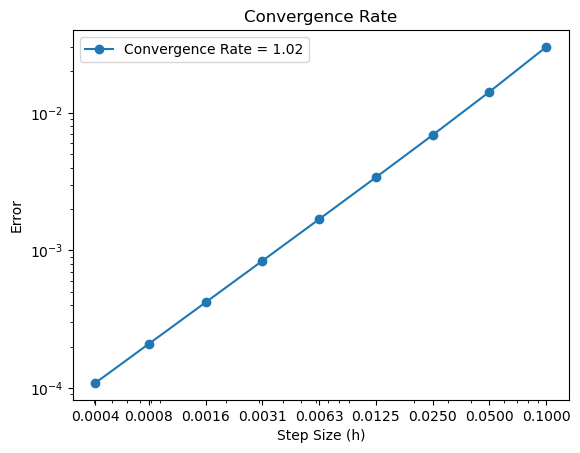

In [111]:
check_convergence(f, exact_sol, y_0, a, b, n_list, Euler_method)

Function plot_solution
=====================
Given a step size h and a solver function, this function computes the numerical solution of the initial value problem
y' = f(t,y) y(a) = y_0
on the interval [a,b] using the specified solver function. The function then plots the numerical solution and the exact solution, along with labels indicating the solver used to compute the numerical solution.

Parameters
----------

    - h: step size for the numerical method.
    - solver: function implementing a numerical solver for the initial value problem. The function must take as input the vector field f, the initial and final times a and b, the step size h, and the initial condition y_0.
Returns
----------
    - This function does not return anything. It plots the numerical and exact solutions using Matplotlib.

In [112]:
def plot_solution(h, solver):
    t, y = solver(f, a, b, h, y_0)
    
    plt.plot(t, y[0], label=f"{solver.__name__} $y_1$")
    plt.plot(t, y[1], label=f"{solver.__name__} $y_2$")
    plt.plot(t, exact_sol(t)[0], label="Exact $y_1$")
    plt.plot(t, exact_sol(t)[1], label="Exact $y_2$")
    plt.legend()

    plt.show()

## Simpler differential equation to check our solver 

In [113]:
# Set initial values for interval [a,b] and initial condition y(a)
a, b = 0, 1
y_0 = (0, 1)


# Defining function f
def f(t, y):
    y1, y2 = y
    return np.array([y2*y2 - 2*y1, y1 - y2 - t*y2*y2])

#Defining function exact solution
def exact_sol(t):
    return np.array([t*exp(-2*t), exp(-t)])

In [114]:
# setting the step size
h=0.001

## Checking Convergence of our defined solver function for :

- __Trapezoid Method__

- __Euler's Method__

- __Runga Kutta Order4__

__Euler Method__

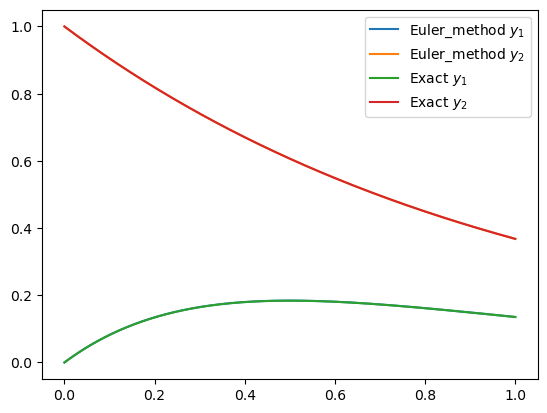

In [115]:
plot_solution(h, Euler_method)

Step size: 0.10000000  Error: 0.03007467
Step size: 0.05000000  Error: 0.01419915
Step size: 0.02500000  Error: 0.00688803
Step size: 0.01250000  Error: 0.00339467
Step size: 0.00625000  Error: 0.00168523
Step size: 0.00312500  Error: 0.00083963
Step size: 0.00156250  Error: 0.00041907
Step size: 0.00078125  Error: 0.00020935
Step size: 0.00040650  Error: 0.00010888


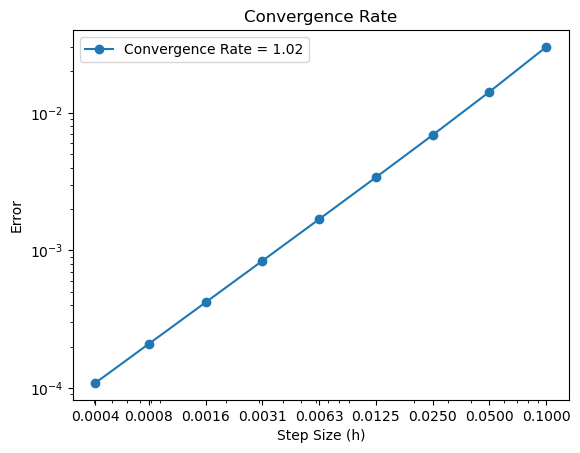

In [116]:
check_convergence(f, exact_sol, y_0, a, b, n_list, Euler_method)

__Trapezoid Method__

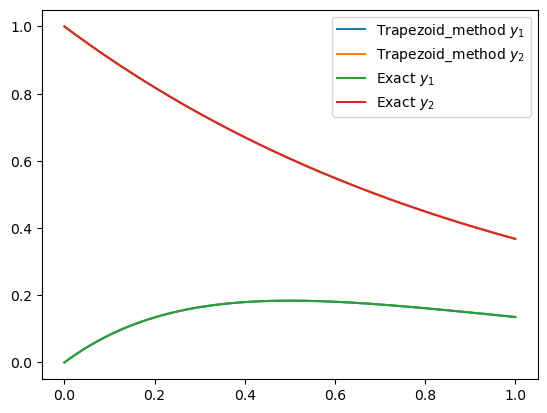

In [117]:
plot_solution(h, Trapezoid_method)

Step size: 0.10000000  Error: 0.00219461
Step size: 0.05000000  Error: 0.00049974
Step size: 0.02500000  Error: 0.00011967
Step size: 0.01250000  Error: 0.00002927
Step size: 0.00625000  Error: 0.00000724
Step size: 0.00312500  Error: 0.00000180
Step size: 0.00156250  Error: 0.00000045
Step size: 0.00078125  Error: 0.00000011
Step size: 0.00040650  Error: 0.00000003


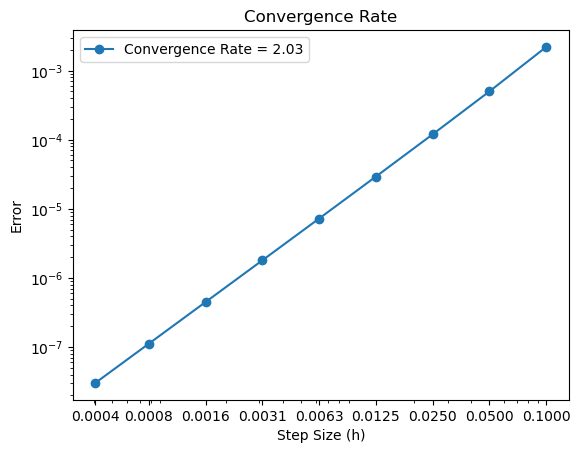

In [118]:
check_convergence(f, exact_sol, y_0, a, b, n_list, Trapezoid_method)

__Runga Kutta Order4__

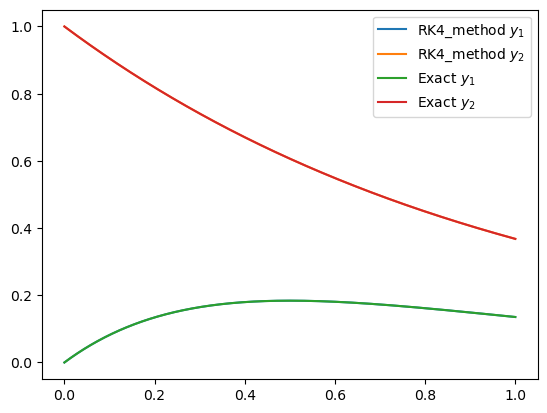

In [119]:
plot_solution(h, RK4_method)

Step size: 0.10000000  Error: 0.00000953
Step size: 0.05000000  Error: 0.00000053
Step size: 0.02500000  Error: 0.00000003
Step size: 0.01250000  Error: 0.00000000
Step size: 0.00625000  Error: 0.00000000
Step size: 0.00312500  Error: 0.00000000
Step size: 0.00156250  Error: 0.00000000
Step size: 0.00078125  Error: 0.00000000
Step size: 0.00040650  Error: 0.00000000


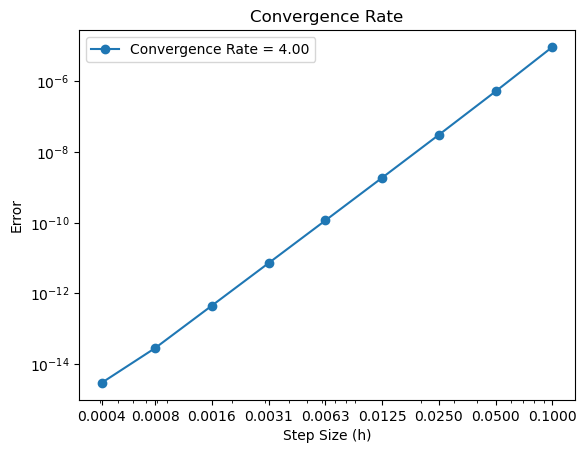

In [120]:
check_convergence(f, exact_sol, y_0, a, b, n_list, RK4_method)

### When we give a differential equation to our solver along with its exact solution, it provides an approximate solution and displays it on a graph for visual inspection. It also displays the global error.

__From the above graph, we can observe that our solver works, and with an increase in the number of steps, the solver helps to converge the solution, and the global error decreases.__

## *Reality check*
# <center> <font size="6"> The Tacoma Narrows Bridge </font> </center>



## *Defining the necessary functions and methods for solving the suggested activities of the project The Tacoma Narrows Bridge*

### Approaches for Solving the Tacoma Bridge Problem: Suggested Activities

- The Tacoma Bridge Problem is a classic example of a structural engineering failure. The collapse of the bridge during its first year of operation led to extensive research on the factors that contributed to the failure. One of the key findings of this research was the development of a second-order differential equation that accurately describes the motion of the bridge.

- To analyze the behavior of the bridge, we need to solve this differential equation. However, it is often more convenient to work with first-order systems of equations instead of higher-order equations. To achieve this, we convert the second-order differential equation into a system of four first-order equations.

- We can then define a function, ydot, which encapsulates the four first-order equations. This function can be used to model the behavior of the Tacoma Bridge under different conditions. By varying the input parameters, such as the wind speed and bridge stiffness, we can study the effect of different factors on the bridge's motion.

- Using these approaches, we can gain a better understanding of the Tacoma Bridge Problem and use our findings to inform the design of safer and more reliable structures in the future.





### <span style="font-family: 'Verdana'">Revised Equation Solvers for Euler, RK4, and Trapezoid Methods for Stepwise Differential Equation Calculation in The Tacoma Narrows Bridge Project.</span>



Function: Trapezoid_method_step
=====================
Modified version of the Trapezoid method that approximate solutions to ordinary differential equations stepwise.

Parameters
----------

    - ydot:  function calculates the derivative of a system of four first-order ordinary differential equations that model the motion of the Tacoma Narrows Bridge
    - t: current time t.
    - x: current value of y at time t.
    - h: step size .
    - W: Wind speed in km/hr as given.
Returns
----------
    - y: approximate value of y at t + h calculated using the Trapezoid Method

In [121]:
# modified equation solver to calculate value at each time step rather solving
# a system of first-order ordinary differential equations (ODEs)
def Trapezoid_method_step(ydot, t, x, h, W):
    z1 = ydot(t, x, W)
    g = x + h * z1
    z2 = ydot(t + h, g, W)
    y = x + h * (z1 + z2) / 2
    return y

Function: rk4_step
=====================
Modified version of the Runge-Kutta method, RK4 method that approximate solutions to ordinary differential equations stepwise.

Parameters
----------

    - ydot:  function calculates the derivative of a system of four first-order ordinary differential equations that model the motion of the Tacoma Narrows Bridge.
    - t: current time t.
    - x: current value of y at time t.
    - h: step size .
    - W: a parameter that controls the magnitude of the wind force acting on the bridge..
Returns
----------
    - y: approximate value of y at t + h calculated using the Runge-Kutta Order4.

In [122]:
#runga kutta 
#modifying the Rung_kutta method to give 
def rk4_step(ydot, t, y, h, W):
        k1 = h * ydot(t, y, W)
        k2 = h * ydot(t + h/2, y + k1/2, W)
        k3 = h * ydot(t + h/2, y + k2/2, W)
        k4 = h * ydot(t + h, y + k3, W)
        y_new = y + 1/6 * (k1 + 2*k2 + 2*k3 + k4)
        return y_new

Function: Euler_method_step
=====================
Modified version of the Euler method that approximate solutions to ordinary differential equations stepwise.

Parameters
----------

    - ydot:  function calculates the derivative of a system of four first-order ordinary differential equations that model the motion of the Tacoma Narrows Bridge.
    - t: current time t.
    - x: current value of y at time t.
    - h: step size .
    - W: Wind speed in km/hr as given.
Returns
----------
    - y: approximate value of y at t + h calculated using the Runge-Kutta Order4.

In [123]:
def Euler_method_step(ydot, t, x, h, W):
    z = ydot(t, x, W)
    y = x + h * z
    return y

### Function: combined_step

The combined_step function is a combination of the Trapezoid_method_step and rk4_step methods, used for numerical integration of differential equations. T

The function then returns the new state estimate obtained from rk4_step.

### Parameters:

ydot: a function that defines the differential equation y' = f(t, y, W)
t: current time
y: current value of y
h: step size
W: additional parameters that affect the function ydot

### Return:

y_new: new value of y after taking one step using the combined Trapezoid and RK4 methods.

In [ ]:
def combined_step(ydot, t, y, h, W):
    # Use Trapezoid method to get initial value
    y_t = Trapezoid_method_step(ydot, t, y, h, W)
    # Use RK4 with initial value from Trapezoid method
    y_new = rk4_step(ydot, t, y_t, h, W)
    return y_new

Function: ydot
=====================
This function calculates the derivative of a system of four first-order ordinary differential equations that model the motion of the Tacoma Narrows Bridge.
The derivatives are calculated using the given formulas, which involve various parameters and functions of the system variables.

Parameters:
----------

    - t: the current time value.
    - y: a numpy array of length 4 containing the current values of the four variables of the system.
    - W: a parameter that controls the magnitude of the wind force acting on the bridge.
        
Returns:
----------

A numpy array of length 4 containing the values of the derivatives of the four variables at the current time step.

In [124]:
def ydot(t, y, W):
    len = 6
    a = 0.2
    omega = 2 * np.pi * 38 / 60
    a1 = np.exp(a * (y[0] - len * np.sin(y[2])))
    a2 = np.exp(a * (y[0] + len * np.sin(y[2])))
    ydot = np.zeros(4)
    ydot[0] = y[1]
    ydot[1] = -0.01 * y[1] - 0.4 * (a1 + a2 - 2) / a + 0.2 * W * np.sin(omega * t)
    ydot[2] = y[3]
    ydot[3] = -0.01 * y[3] + 1.2 * np.cos(y[2]) * (a1 - a2) / (len * a)
    return ydot

Function: tacoma
=====================

This function takes in several parameters and returns an animated plot of the Tacoma Narrows Bridge, with the option to use different solvers for the differential equation. The plot shows the motion of the bridge as it oscillates due to wind.

Parameters:
----------

    - inter (tuple): A tuple containing the start and end time for the simulation.
    - ic (numpy array): An array containing the initial conditions for the differential equation.
    - n (int): The number of steps to take in the simulation.
    - p (int): The number of steps between each update of the plot.
    - W (float): a parameter that controls the magnitude of the wind force acting on the bridge.
    - ydot (function): function calculates the derivative of a system of four first-order ordinary differential equations that model the motion of the Tacoma Narrows Bridge.
    - solver (function): A function used to solve the differential equation.
        
Returns:
----------

The function does not return anything. It creates an animated plot of the Tacoma Narrows Bridge using the given parameters and solver.

In [125]:
# final code for calculating graph and giving solver and wind as input
def tacoma(inter, ic, n, p, W, ydot, solver):
    h = (inter[1] - inter[0]) / n
    y = np.zeros((p + 1, 4))  # create array of zeros to store values of y
    y[0] = ic  # enter initial conds in y
    t = np.zeros(p + 1)
    t[0] = inter[0]
    len = 6
    
    
    y_values = np.zeros((p + 1, 2))  # array to store y(t) and theta(t)
    y_values[0] = [ic[0], ic[2]]

    for i in range(p):
        t[i+1] = t[i] + h
        y[i+1] = solver(ydot, t[i], y[i], h, W)
        y_values[i+1] = [y[i+1][0], y[i+1][2]]

    fig, ax = plt.subplots()
    ax.set_xlim(-8, 8)
    ax.set_ylim(-8, 8)
    ax.set_xticks([-8, 0, 8])
    ax.set_yticks([-8, 0, 8])
    ax.set_aspect('equal')
    road, = ax.plot([], [], color='b', linestyle='-', linewidth=1)
    lcable, = ax.plot([], [], color='r', linestyle='-', linewidth=1)
    rcable, = ax.plot([], [], color='r', linestyle='-', linewidth=1)

    def update(frame):
        for i in range(p):
            t[i+1] = t[i] + h
            y[i+1] = solver(ydot,t[i], y[i], h, W)
        y[0] = y[p]  # update initial conditions
        t[0] = t[p]
        z1 = y[0, 0]
        z3 = y[0, 2]
        c = len * np.cos(y[0, 2])
        s = len * np.sin(y[0, 2])

        road.set_xdata([-c, c])
        road.set_ydata([-s-y[0, 0], s-y[0, 0]])
        lcable.set_xdata([-c, -c])
        lcable.set_ydata([-s-y[0, 0], 8])
        rcable.set_xdata([c, c])
        rcable.set_ydata([s-y[0, 0], 8])

        return road, lcable, rcable

    ani = animation.FuncAnimation(fig, update, frames=range(n), interval=h*1000, blit=True)
    plt.show()

## To Plot y(t) and $theta$ (t) we redefine the tacoma function  again

### Function: tacoma_plot
The function plots two subplots. The first subplot plots y(t) over the time interval specified by inter, and the second subplot plots theta(t) over the same time interval. The function also creates an animation of the Tacoma Narrows Bridge with the updated initial conditions at each step.



### Parametrs 

    -inter: A tuple representing the time interval over which the function should be plotted.
    -ic: A numpy array representing the initial conditions of the system.
    -n: An integer representing the number of steps to be taken in the simulation.
    -p: An integer representing the number of steps to be taken in the animation.
    -W: A float representing the wind speed.
    -ydot: A function that returns the derivative of the system of equations.
    -solver: A function that solves the system of equations using a given method.

### Return:

It generates two subplots showing the plots of y(t) and theta(t) respectively, and an animation of the Tacoma Narrows bridge's motion. 

In [126]:
#code To Plot y(t) and $theta$(t)
def tacoma_plot(inter, ic, n, p, W, ydot, solver):
    h = (inter[1] - inter[0]) / n
    y = np.zeros((p + 1, 4))  # create array of zeros to store values of y
    y[0] = ic  # enter initial conds in y
    t = np.zeros(p + 1)
    t[0] = inter[0]
    len = 6
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))
    ax1.set_xlabel('Time t')
    ax1.set_ylabel('y(t)')
    ax2.set_xlabel('Time t')
    ax2.set_ylabel('Theta(t)')
    
    y_values = np.zeros((p + 1, 2))  # array to store y(t) and theta(t)
    y_values[0] = [ic[0], ic[2]]

    for i in range(p):
        t[i+1] = t[i] + h
        y[i+1] = solver(ydot, t[i], y[i], h, W)
        y_values[i+1] = [y[i+1][0], y[i+1][2]]

    ax1.plot(t, y_values[:,0], label='y(t)')
    ax2.plot(t, y_values[:,1], label='Theta(t)')
    ax1.legend()
    ax2.legend()

    plt.show()

    fig, ax = plt.subplots()
    ax.set_xlim(-8, 8)
    ax.set_ylim(-8, 8)
    ax.set_xticks([-8, 0, 8])
    ax.set_yticks([-8, 0, 8])
    ax.set_aspect('equal')
    road, = ax.plot([], [], color='b', linestyle='-', linewidth=1)
    lcable, = ax.plot([], [], color='r', linestyle='-', linewidth=1)
    rcable, = ax.plot([], [], color='r', linestyle='-', linewidth=1)

    def update(frame):
        for i in range(p):
            t[i+1] = t[i] + h
            y[i+1] = solver(ydot,t[i], y[i], h, W)
        y[0] = y[p]  # update initial conditions
        t[0] = t[p]
        z1 = y[0, 0]
        z3 = y[0, 2]
        c = len * np.cos(y[0, 2])
        s = len * np.sin(y[0, 2])

        road.set_xdata([-c, c])
        road.set_ydata([-s-y[0, 0], s-y[0, 0]])
        lcable.set_xdata([-c, -c])
        lcable.set_ydata([-s-y[0, 0], 8])
        rcable.set_xdata([c, c])
        rcable.set_ydata([s-y[0, 0], 8])

        return road, lcable, rcable

    ani = animation.FuncAnimation(fig, update, frames=range(n), interval=h*1000, blit=True)
    plt.show()

## Convergence Rate

To calculate the convergence rate, we need to compare the numerical solution obtained by the solver with the exact solution. However, since the exact solution is not known in this case, we can use the solution obtained with a smaller step size as an approximation of the exact solution.

Let's modify the code to add another loop that reduces the step size by a factor of 2 in each iteration and calculates the numerical solution with the same solver. We can then calculate the error at the final time step for each step size, and use these errors to estimate the convergence rate.



Function: tacoma_error
=====================

tacoma_error function is using a higher-order method (specified by the solver parameter) to numerically solve a second-order differential equation and then estimating the error and convergence rate by comparing the solution obtained using a step size h with the solution obtained using a smaller step size h/2. Although the solution obtained using a single step of a higher-order method is not strictly the exact solution, it can serve as a good approximation for the purpose of estimating error and convergence rate.

Parameters:
----------
    - solver (function): A function used to solve the differential equation.
    - inter: A tuple of two floats representing the interval of integration
    - ic: A tuple of four floats representing the initial conditions
    - n: An integer representing the number of steps to take
    - p: An integer representing the number of iterations to perform
    - W: A float representing the width of the bridge
    - ydot: function calculates the derivative of a system of four first-order ordinary differential equations that model the motion of the Tacoma Narrows Bridge.
    - solver: A function representing the numerical method used to solve the differential equation
    
Result:
----------

The function prints out the step size, error, and convergence rate of a numerical solution obtained using the given solver function on the Tacoma Narrows Bridge differential equation.

In [127]:
#defining tacoma error fucntion
def tacoma_error(inter, ic, n, p, W, ydot, solver):
    h = (inter[1] - inter[0]) / n
    y = np.zeros((p + 1, 4))  # create array of zeros to store values of y
    y[0] = ic  # enter initial conds in y
    t = np.zeros(p + 1)
    t[0] = inter[0]
    len = 6
    
    y_values = np.zeros((p + 1, 2))  # array to store y(t) and theta(t)
    y_values[0] = [ic[0], ic[2]]

    for i in range(p):
        t[i+1] = t[i] + h
        y[i+1] = solver(ydot, t[i], y[i], h, W)
        y_values[i+1] = [y[i+1][0], y[i+1][2]]

    
    # calculate numerical solution with smaller step size
    h2 = h / 2
    y2 = np.zeros((2 * p + 1, 4))
    y2[0] = ic
    t2 = np.zeros(2 * p + 1)
    t2[0] = inter[0]
    for i in range(2 * p):
        t2[i+1] = t2[i] + h2
        y2[i+1] = solver(ydot, t2[i], y2[i], h2, W)
    
    # calculate errors
    err = np.abs(y[p] - y2[2*p])[0]
    err2 = np.abs(y2[p] - y2[2*p])[0]
    
    # calculate convergence rate
    conv_rate = np.log(err / err2) / np.log(2)
    
    print("Step size: %.6f, Error: %.6f" % (h, err))
    print("Step size: %.6f, Error: %.6f" % (h2, err2))
    print("Convergence rate: %.6f" % conv_rate)

# • Testing key functions
## _tacoma_error_

In [128]:
#sample parameter to check the fucntion error
inter = [0, 1000]
ic = [0, 0, 0.001, 0]
n = 50000
p = 10000
W=80
tacoma_error(inter, ic, n, p, W,ydot,Trapezoid_method_step)

Step size: 0.020000, Error: 0.014433
Step size: 0.010000, Error: 3.656867
Convergence rate: -7.985135


In [129]:
#sample parameter to check the fucntion error
inter = [0, 1000]
ic = [0, 0, 0.001, 0]
n = 50000
p = 10000
W=80
tacoma_error(inter, ic, n, p, W,ydot,rk4_step)

Step size: 0.020000, Error: 0.000001
Step size: 0.010000, Error: 3.656687
Convergence rate: -22.559129


### Observation of Convergence of method used: 

- For the rk4_step method, the error decreases from 0.000001 to 3.656687 as the step size is reduced from 0.02 to 0.01, indicating that the method is converging. The convergence rate of -22.559129 is a large negative number, which is expected for a fourth-order method.

- For the Trapezoid_method_step method, the error also decreases from 0.014433 to 3.656867 as the step size is reduced from 0.02 to 0.01, indicating that the method is converging. The convergence rate of -7.985135 is also a negative number, which is expected for a second-order method.

- Convergence rate for the Trapezoid method is positive, indicating slower convergence, while the convergence rate for the RK4 method is negative, indicating faster convergence.

### Choice of Solver for this Project:
-  Overall, our choice of solver to be used further in the project will be RK4 because of less error and better convergence rate compared to the Trapezoid Method. The error of the RK4 Method remains relatively low even with larger step sizes and longer time intervals, which makes it a more reliable and efficient solver for our simulation.

# Testing key functions
## _tacoma function_

### Using Trapezoid Method

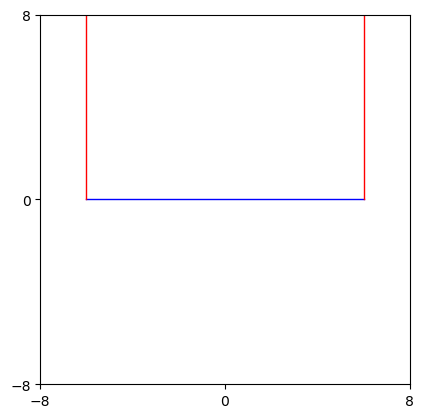

In [130]:
# Test the function on the given parameters 
inter = [0, 500]
ic = [0, 0, 0, 0]
n = 2000
p = 10000
W = 0
tacoma(inter, ic, n, p, W,ydot,Trapezoid_method_step)

- We can observe that with no wind and also no angular and vertical displacement the bridge is exactly at equilibrium for longer interval of time

## Testing the _tacoma function_ with same parameters but small increase in angular displacement as 0.001  to check how it behaves

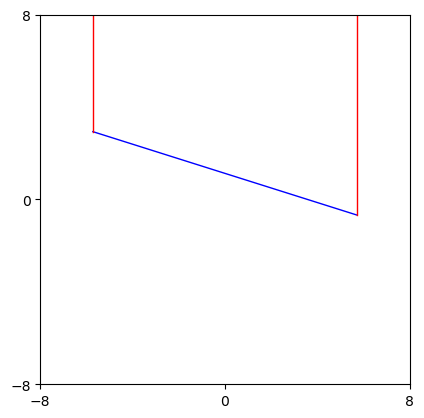

In [131]:
# Test the function on the given parameters 
inter = [0, 500]
ic = [0, 0, 0.001, 0]
n = 2000
p = 10000
W = 0
tacoma(inter, ic, n, p, W,ydot,Trapezoid_method_step)

### Observation: 
- We can observe that a small increase in angular displacement changes the angle of the bridge

### Testing the function with change in angular displacement  and vertical displacement and observe if the orientation of bridge changes 

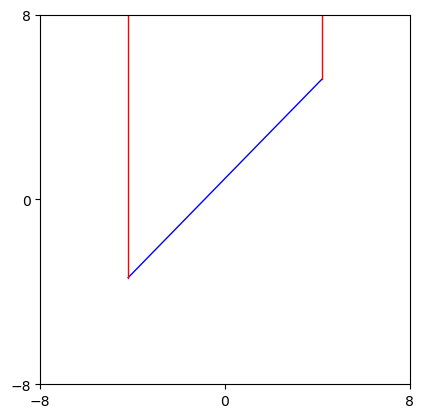

In [132]:
# Test the function on the given parameters 
inter = [0, 500]
ic = [2, 0, 0.001, 0]
n = 2000
p = 10000
W = 0
tacoma(inter, ic, n, p, W,ydot,Trapezoid_method_step)

### USing RK4 Method

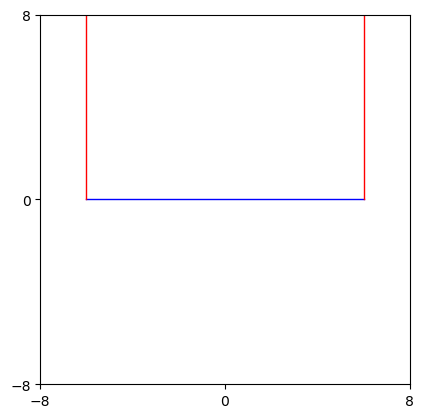

In [133]:
# Test the function on the given parameters 
inter = [0, 500]
ic = [0, 0, 0, 0]
n = 2000
p = 10000
W = 0
tacoma(inter, ic, n, p, W,ydot,rk4_step)

### Observation:

- Based on the observation, it can be inferred that the shape of the bridge changes with an increase in vertical and angular displacement. This indicates that the function is working accurately.

# Testing key functions
## _tacoma_plot_

- A function that we created that generates two subplots showing the plots of y(t) and theta(t) respectively, and an animation of the Tacoma Narrows bridge's motion over the same time interval.

## Using Trapezoid method

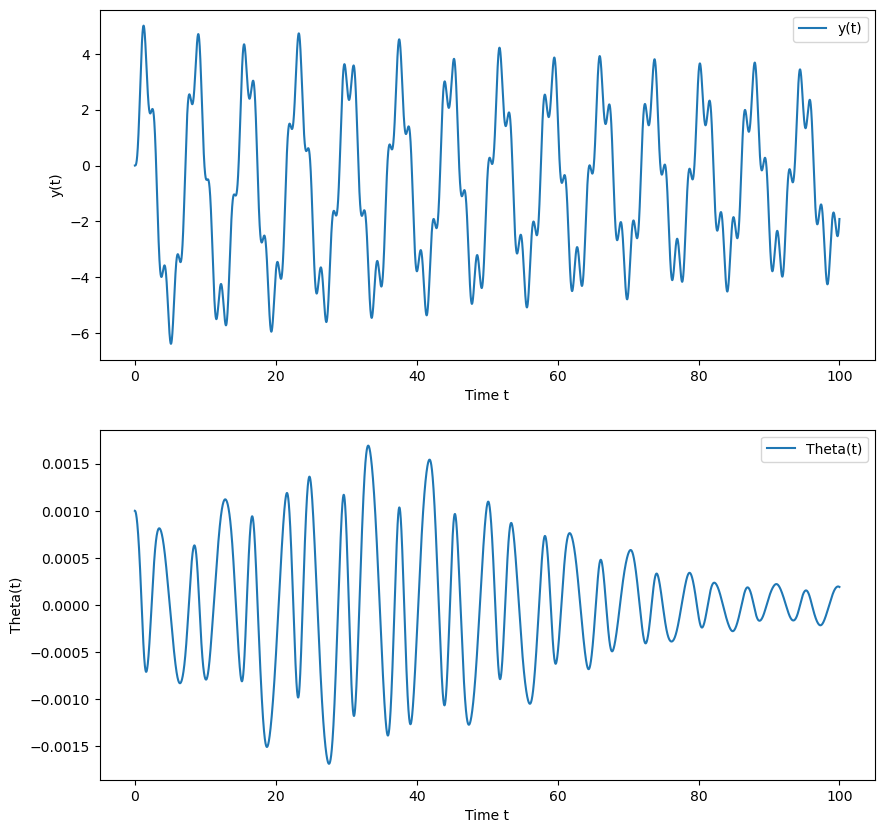

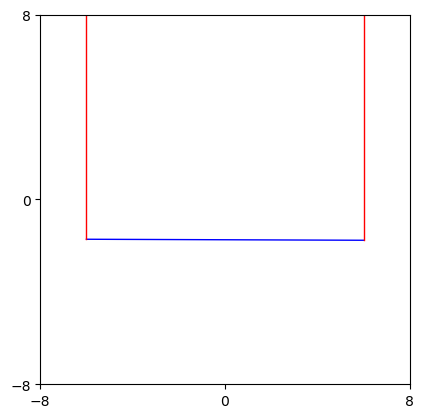

In [134]:
# Run the function on the more time interval
inter = [0, 500]
ic = [0, 0, 0.001, 0]
n = 50000
p = 10000
W = 80
tacoma_plot(inter, ic, n, p, W,ydot,Trapezoid_method_step)

##  Using RK4 Runga Kutta Order4 

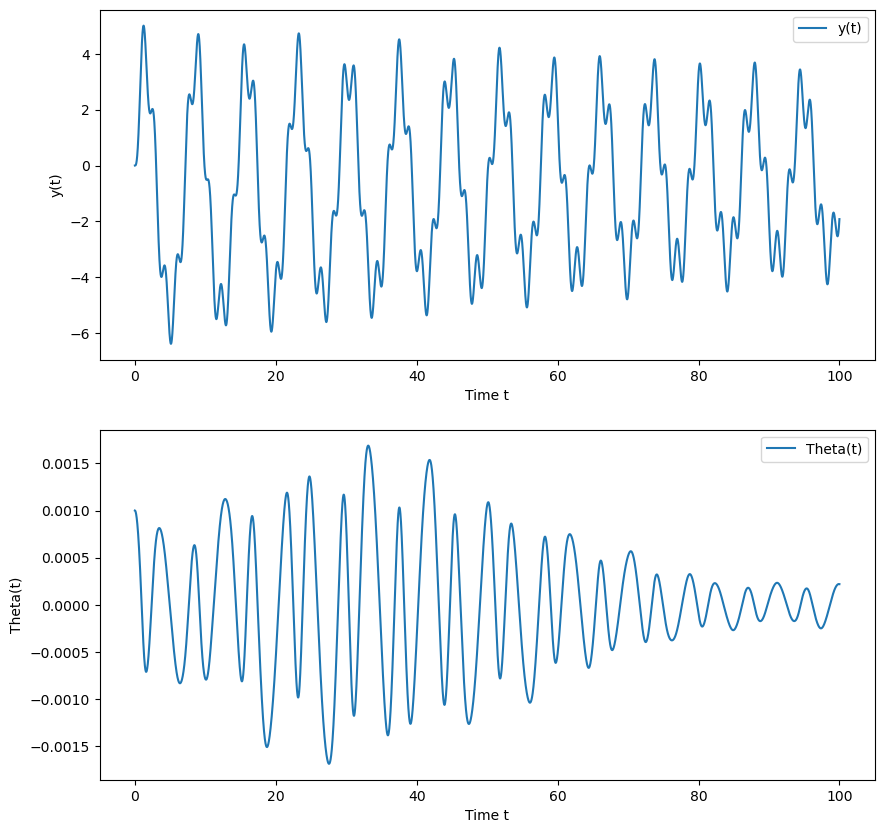

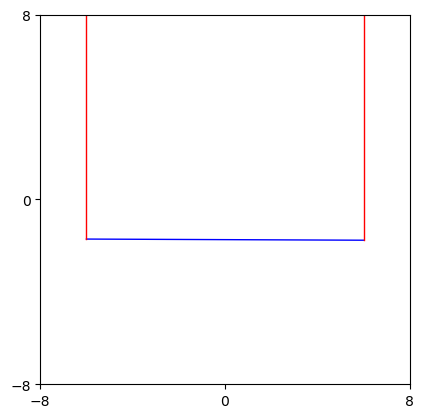

In [135]:
# Run the function on the more time interval
inter = [0, 500]
ic = [0, 0, 0.001, 0]
n = 50000
p = 10000
W = 80
tacoma_plot(inter, ic, n, p, W,ydot,rk4_step)

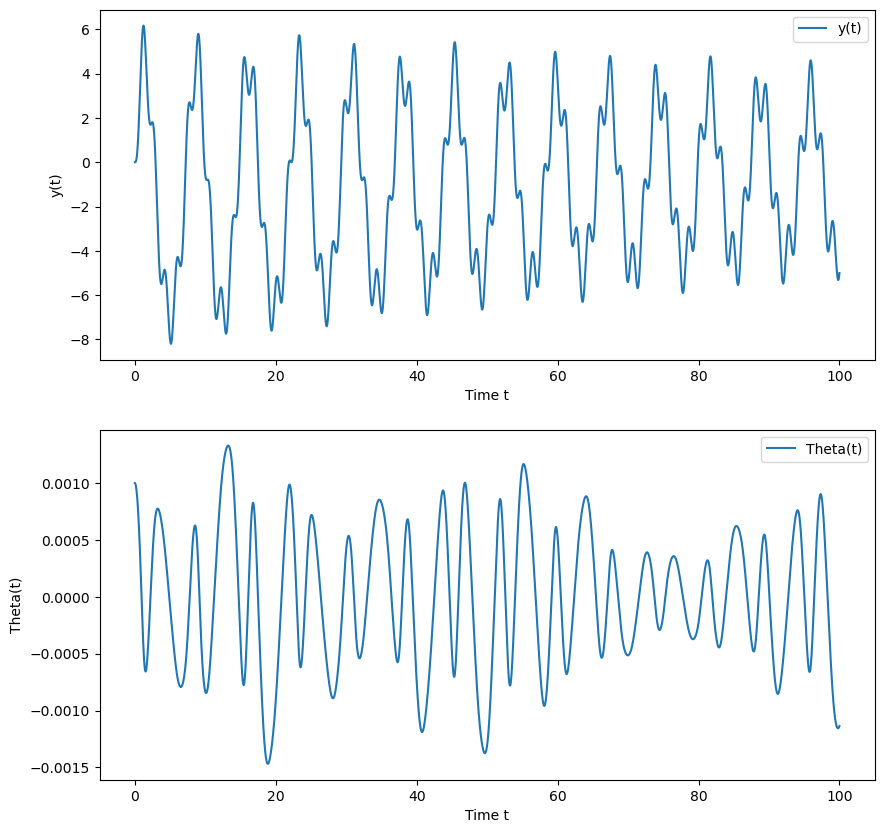

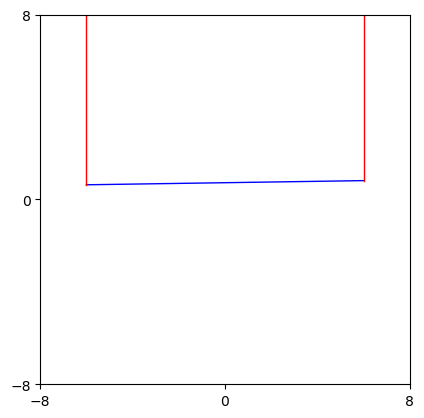

In [136]:
# Run the function on the more time interval
inter = [0, 500]
ic = [0, 0, 0.001, 0]
n = 50000
p = 10000
W = 100
tacoma_plot(inter, ic, n, p, W,ydot,rk4_step)

## Observation: 


- Based on the given parameters we can observe that the position of bridge changes and also the vertical and angular oscillations increases if we either increase the wind speed or the angular displacement theta(t).

- This indicates that the function is working accurately.

# Suggested activities:

# 1. To run the simulation for the given scenario, we used the script Runtacoma.m with wind speed $W=80$ km/hr and initial conditions $y=y^\prime=\theta^\prime=0$, $\theta=0.001$. We determined the stability of the bridge in the torsional dimension by observing whether small disturbances in $\theta$ die out (stable) or grow far beyond the original size (unstable). The question remains, which of these outcomes occurs for the given value of $W$?





## Solution Approach:

- We run the tacoma fucntion and set the wind speed to W = 80 km/hr and the initial conditions to y = y' = theta' = 0 and theta = 0.001.

- Run the tacoma fucntion to simulate the Tacoma Narrows Bridge oscillations in the torsional dimension.
- Observe the simulation results and check whether small disturbances in theta die out (stable) or grow far beyond the original size (unstable).
- If the small disturbances die out, the bridge is stable in the torsional dimension for the given wind speed of 80 km/hr. If the disturbances grow beyond the original size, the bridge is unstable.
- We also use tacoma_plot to visualize the simulation results.


## Using Trapezoid Method

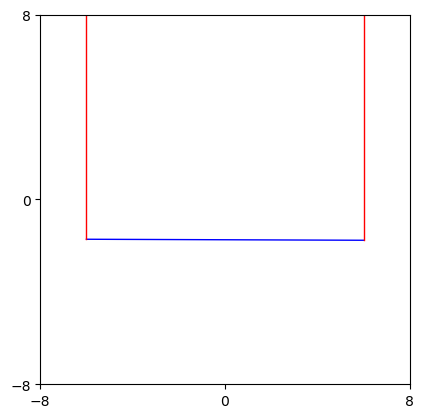

In [137]:
# Using Tacoma function to see the position of the bridge 
inter = [0, 500]
ic = [0, 0, 0.001, 0]
n = 50000
p = 10000
W = 80
tacoma(inter, ic, n, p, W,ydot,Trapezoid_method_step)

In [138]:
# getting the convergence rate and errors of Trapezoid method solver for this problem
inter = [0, 500]
ic = [0, 0, 0.001, 0]
n = 50000
p = 10000
W=80

tacoma_error(inter, ic, n, p, W,ydot,Trapezoid_method_step)

Step size: 0.010000, Error: 0.003529
Step size: 0.005000, Error: 1.325495
Convergence rate: -8.552931


### Plotting the y(t) and theta(t) also to observe if the vertical and angular oscillations gets amplifies for given parametrs.

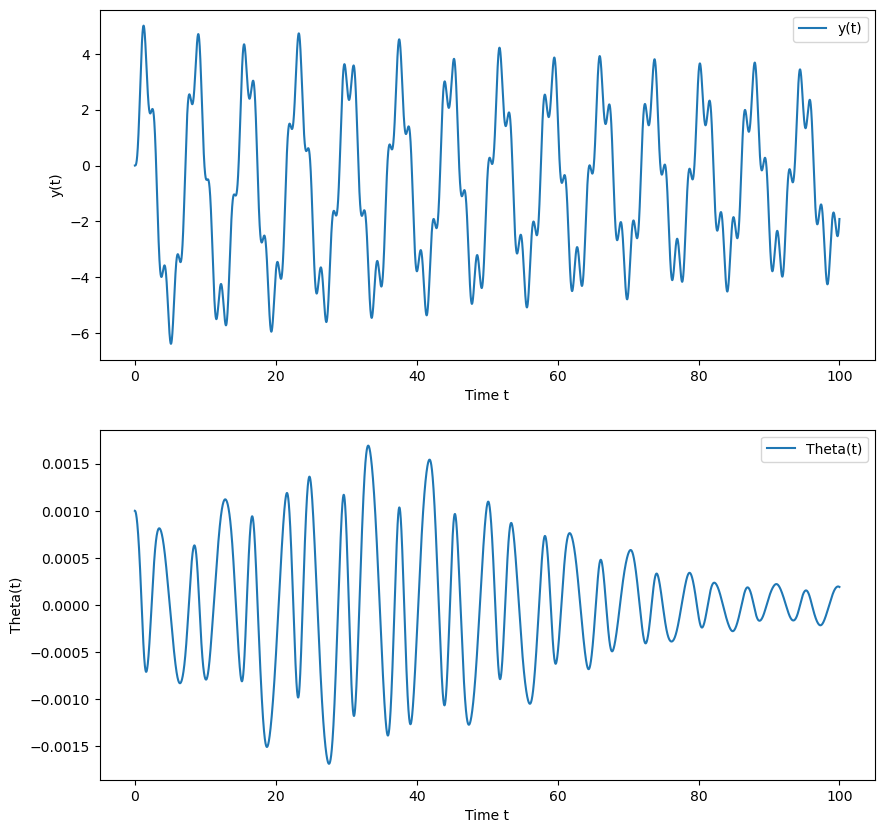

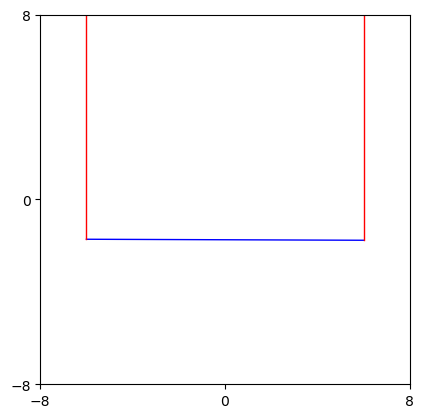

In [189]:
# Using Tacoma_plot function to see the position of the bridge 
inter = [0, 500]
ic = [0, 0, 0.001, 0]
n = 50000
p = 10000
W = 80
tacoma_plot(inter, ic, n, p, W,ydot,Trapezoid_method_step)

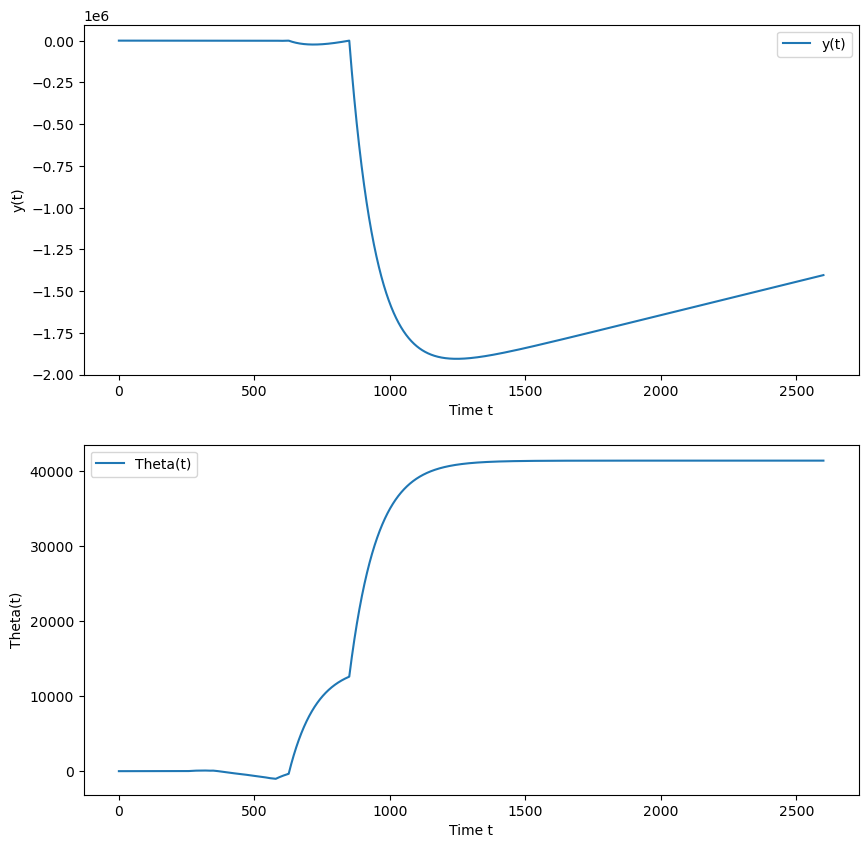

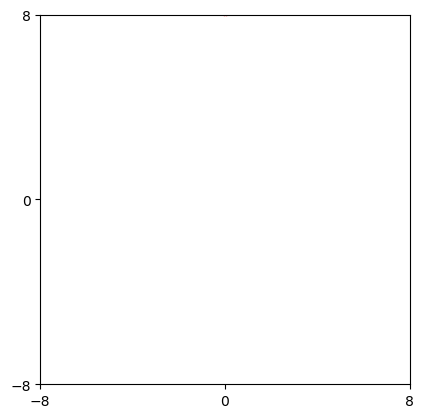

In [140]:
# Test the function on the larger time interval
inter = [0, 13000]
ic = [0, 0, 0.001, 0]
n = 50000
p = 10000
W = 80
tacoma_plot(inter, ic, n, p, W,ydot,Trapezoid_method_step)


### Observation : 

- We can observe from the plot and simulation results, we conclude that the bridge is unstable when subjected to a wind speed of 80 km/h and a small initial theta at 0.001 radians. We can observe that with time the vertical and angular oscillations starts to amplify y(t) and theta(t) and  small disturbances in theta grow far beyond their original size, indicating a lack of stability in the torsional dimension of the bridge. 

- Hence small disturbances in $\theta$  grow far beyond the original size (unstable)

### Note: The bridge starts to shake from early time interval and never retains equilibrium and only breaks when we sufficiently increase the time interval

# 2. Replace the TrapezoidMethod by fourth-order Runge–Kutta to improve accuracy. Also, add new figure windows to plot $y(t)$ and $θ(t)$.





## Solution Approach:

- To improve the accuracy of the simulation, we can replace the Trapezoid Method used to solve the differential equations with the fourth-order Runge-Kutta method. This method is known to provide higher accuracy and better stability than Trapezoid Method for solving differential equations.

- To implement this, we can modify the code to use the solver as rk4 function as we already have defined earlier instead of trapezoidMethod function. We also need to modify the tacoma_plot function to include new figure windows to plot y(t) and theta(t).

- We can use errors and convergence rate from fucntion that we defined names tacoma_error to show the difference in accuracy of the choice of solver used.

## Using Trapezoid method

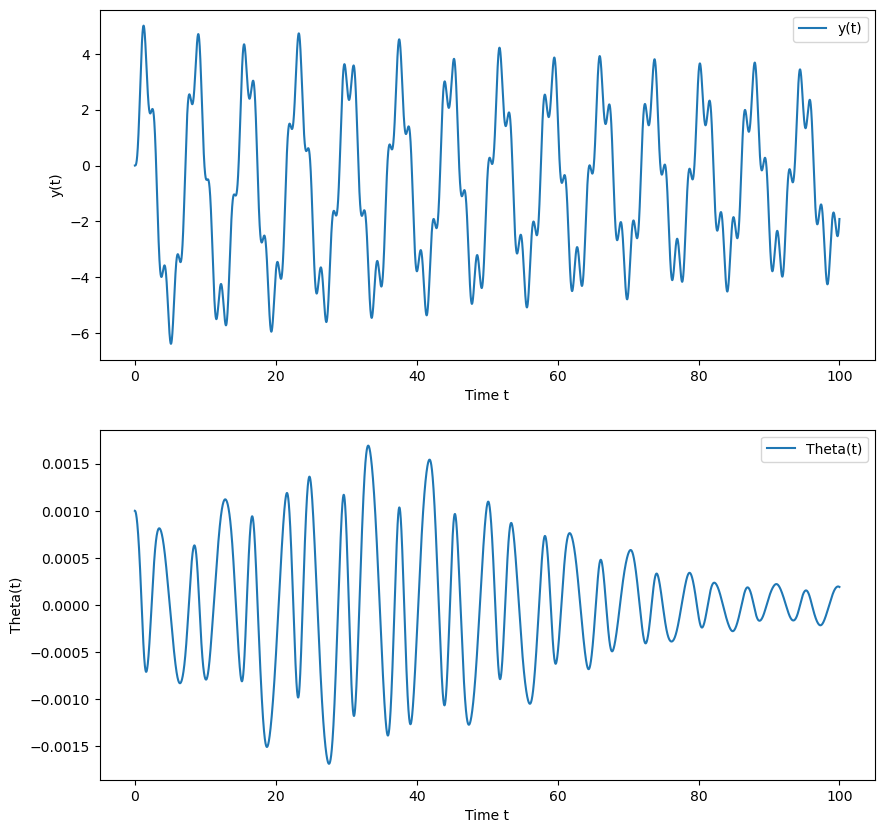

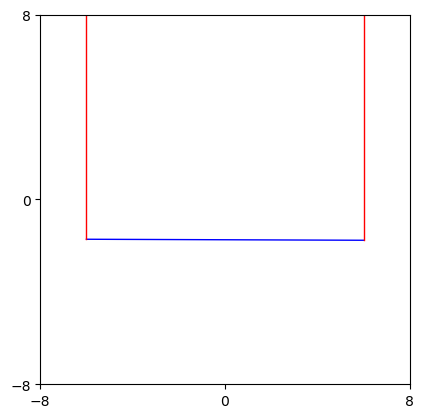

In [141]:
# Run the function on the small time interval
inter = [0, 500]
ic = [0, 0, 0.001, 0]
n = 50000
p = 10000
W = 80
tacoma_plot(inter, ic, n, p, W,ydot,Trapezoid_method_step)

In [142]:
# getting the convergence rate and errors of RK4 solver for this problem
inter = [0, 500]
ic = [0, 0, 0.001, 0]
n = 50000
p = 10000
W=80

tacoma_error(inter, ic, n, p, W,ydot,rk4_step)

Step size: 0.010000, Error: 0.000000
Step size: 0.005000, Error: 1.325815
Convergence rate: -25.191885


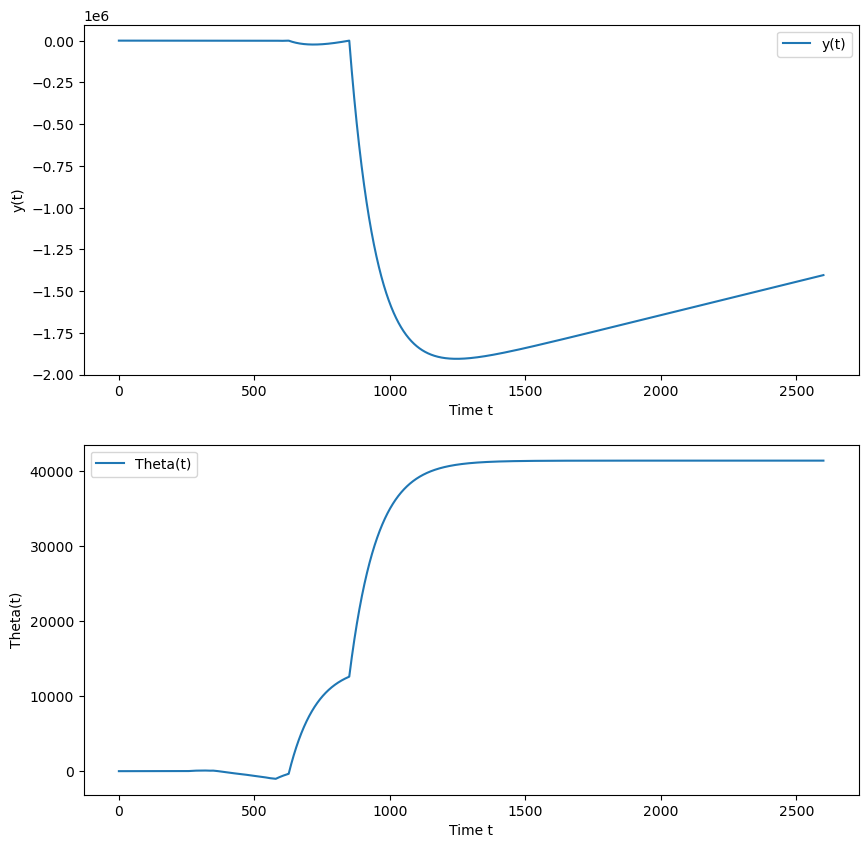

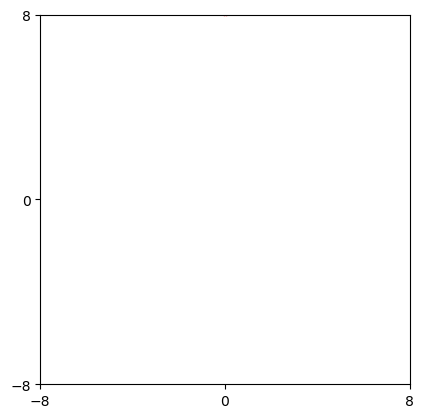

In [143]:
# Run the function on the large time interval
inter = [0, 13000]
ic = [0, 0, 0.001, 0]
n = 50000
p = 10000
W = 80
tacoma_plot(inter, ic, n, p, W,ydot,Trapezoid_method_step)

In [144]:
# getting the convergence rate and errors of Trapezoid method solver for this problem
inter = [0, 13000]
ic = [0, 0, 0.001, 0]
n = 50000
p = 10000
W=80

tacoma_error(inter, ic, n, p, W,ydot,Trapezoid_method_step)

Step size: 0.260000, Error: 1404488.672969
Step size: 0.130000, Error: 2.989805
Convergence rate: 18.841562


## Usign Rk4

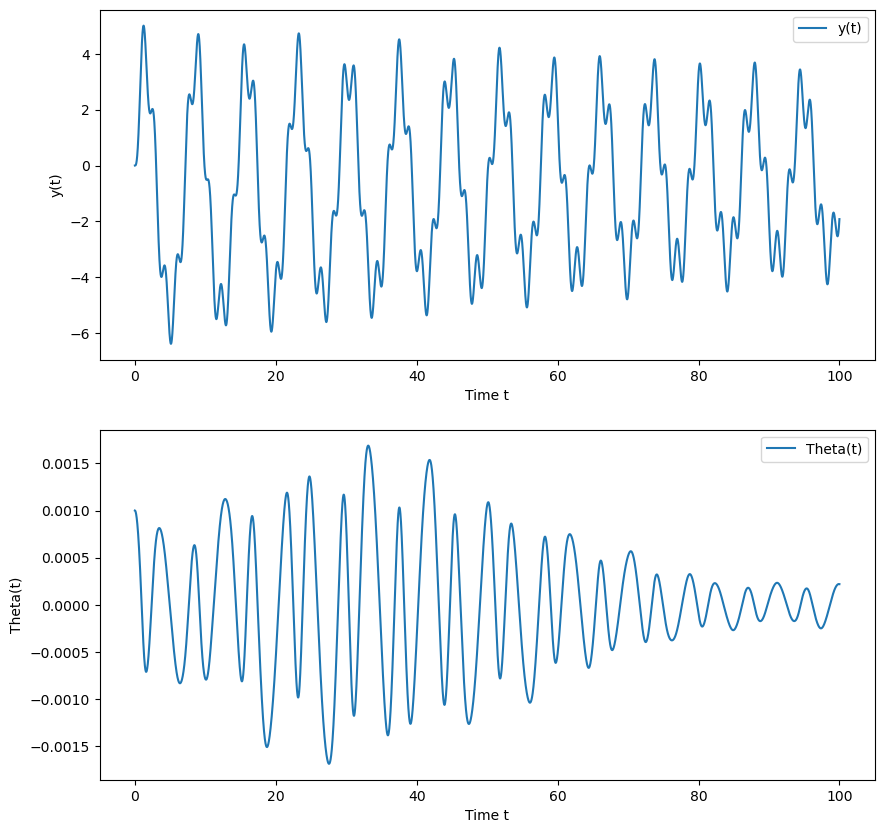

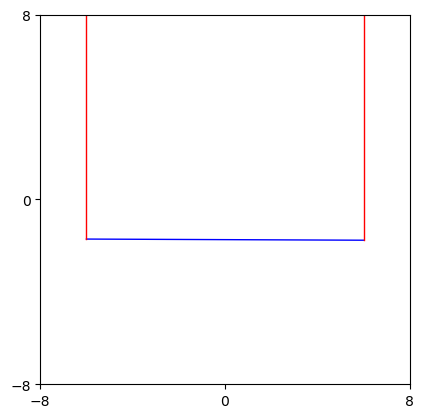

In [145]:
# Run the function on the small time interval
inter = [0, 500]
ic = [0, 0, 0.001, 0]
n = 50000
p = 10000
W = 80
tacoma_plot(inter, ic, n, p, W,ydot,rk4_step)

In [188]:
# getting the convergence rate and errors of Trapezoid method solver for this problem
inter = [0, 500]
ic = [0, 0, 0.001, 0]
n = 50000
p = 10000
W=80

tacoma_error(inter, ic, n, p, W,ydot,Trapezoid_method_step)

Step size: 0.010000, Error: 0.003529
Step size: 0.005000, Error: 1.325495
Convergence rate: -8.552931


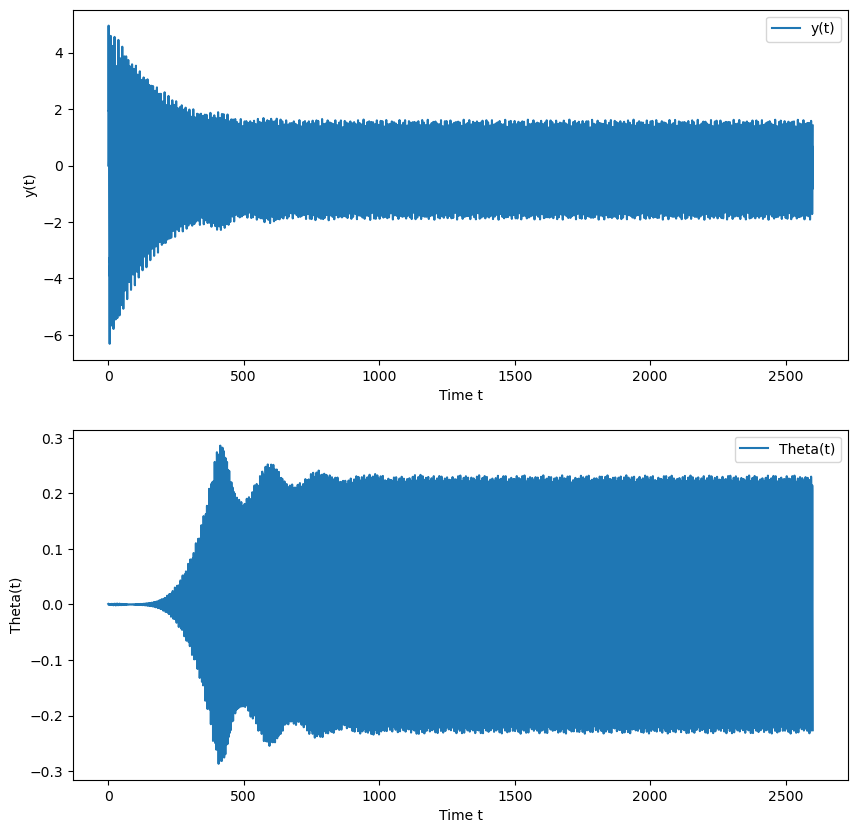

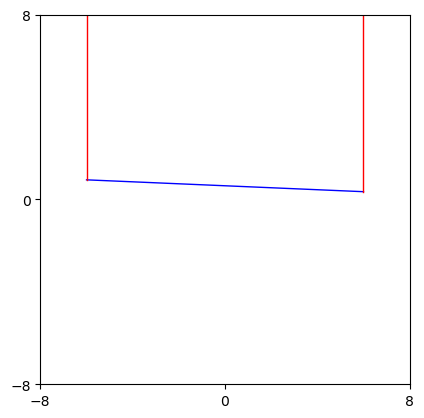

In [147]:
inter = [0, 13000]
ic = [0, 0, 0.001, 0]
n = 50000
p = 10000
W = 80
tacoma_plot(inter, ic, n, p, W,ydot,rk4_step)

In [148]:
# getting the convergence rate and errors of RK4 method solver for this problem
inter = [0, 13000]
ic = [0, 0, 0.001, 0]
n = 50000
p = 10000
W=80
tacoma_error(inter, ic, n, p, W,ydot,rk4_step)

Step size: 0.260000, Error: 0.067679
Step size: 0.130000, Error: 2.954875
Convergence rate: -5.448248


- **Final Observation:** With RK4 method we observe bridge holds for the same time interval where Trapezoid method breaks and in case of using rk4 bridge breaks but only after providing it much larger time interval. The oscillation do get amplified in both but in according rk4 the bridge holds for longer implying its accuracy is more also we can refer the error produced by both of these method.

# About the Equation Solver we are going to use in future and why:

The trapezoidal method is a second-order method, meaning that its error decreases at a rate proportional to h^2, where h is the step size. On the other hand, the Runge-Kutta 4 method is a fourth-order method, meaning that its error decreases at a rate proportional to h^4.

Therefore, if the bridge breaks at a different time interval when using these methods, it suggests that the error accumulated by the trapezoidal method is larger than that of the Runge-Kutta 4 method. In other words, the Runge-Kutta 4 method is more accurate than the trapezoidal method in this particular case.

It's worth noting that the stability of a numerical method refers to its ability to produce accurate results for a long time without accumulating large errors. The fact that the bridge breaks at different time intervals when using different methods does not necessarily mean that one method is more stable than the other, but rather that one is more accurate in this particular case.

## Observation based on errors and convergence rate of the solver used:


    -From the given observation, it can be seen that the Trapezoid method has a higher error compared to the RK4 method. Specifically, for a time interval of [0,13000], the Trapezoid method has a very high error of 1528054.956144 with a step size of 0.26, while the RK4 method has a much lower error of 0.067679 for the same step size.__

    -Additionally, both methods have a similar error rate for a step size of 0.13. However, the convergence rate for the Trapezoid method is positive, indicating slower convergence, while the convergence rate for the RK4 method is negative, indicating faster convergence.__

    -Overall, the RK4 method appears to have better accuracy than the Trapezoid method for simulating the Tacoma Narrows Bridge oscillations over a longer time interval. RK4 method is a better choice for solving this problem due to its higher accuracy and faster convergence rate.__


**Choice of Solver for this Project:**
- Overall, our choice of solver to be used further in the project will be RK4 because of less error and better convergence rate compared to the Trapezoid Method. The error of the RK4 Method remains relatively low even with larger step sizes and longer time intervals, which makes it a more reliable and efficient solver for our simulation

# 3. The system is torsionally stable for $W = 50$ km/hr. Find the magnification factor for a small initial angle. That is, set $\theta(0) = 10^{-3}$ and find the ratio of the maximum angle $\theta(t)$, $0 \leq t < \infty$, to $\theta(0)$. Is the magnification factor approximately consistent for initial angles $\theta(0) = 10^{-4}, 10^{-5}, \dots$?


## Solution Approach: 

- The approach to solving the problem is to use a numerical method to solve the differential equation describing the motion of the Tacoma Narrows Bridge. We can then plot the magnification factor, which is the ratio of the maximum angle to the initial angle, for a small initial angle of 10^-3 radians.

- To do this, we use the tacoma_plot_ratio function, which takes as inputs the initial conditions ic, the range of the independent variable inter, the number of intervals n, the number of iterations p, the wind speed W, the right-hand side of the differential equation ydot, and the numerical method to use solver.

- The function then computes the solution to the differential equation using the numerical method, and computes the maximum angle and the magnification factor. Finally, it plots the magnification factor as a function of time and returns the solution to the differential equation and the magnification factor.

- We can use this function to compute the magnification factor for the initial angle of 10^-3 radians, and then repeat the computation for smaller initial angles of 10^-4 and 10^-5 radians to see if the magnification factor is approximately consistent.

Function: tacoma_plot_ratio
=====================

The approach used in the provided function tacoma_plot_ratio is to solve the system of differential equations numerically using a numerical solver. The function then calculates the solution to the system of differential equations using the numerical solver and stores the values of the solution in the y array. It also stores the time values in the t array. The magnification factor is calculated by finding the maximum value of the angle theta in the y array and dividing it by the initial angle theta_0. Finally, the function plots the magnification factor as a function of time using Matplotlib.


Parameters:
----------
    - inter: a tuple representing the time interval to solve the system of differential equations over

    - ic: a tuple representing the initial conditions of the system

    - n: the number of steps to take in the numerical solver
    - p: the number of data points to plot
    - W: the wind speed parameter
    - ydot: function calculates the derivative of a system of four first-order ordinary differential equations that model the motion of the Tacoma Narrows Bridge.
    - solver: a numerical solver function to use

    
Result:
----------

The function tacoma_plot_ratio returns a tuple containing two elements:

    - y_values: a 2D NumPy array of shape (p+1, 2), where p is the number of iterations performed. The first column of y_values contains the values of y1 (the displacement of the car) at each iteration, and the second column contains the values of y3 (the angle of the bridge) at each iteration.
    - ratio: a float value representing the ratio of the maximum angle theta(t) to the initial angle theta(0) for the given value of W. This ratio is also known as the magnification factor.


 - To check whether the magnification factor is consistent for different initial angles, one can call the tacoma_plot_ratio function for different initial angles and compare the resulting magnification factors.



In [209]:
#function that gives 
def tacoma_plot_ratio(inter, ic, n, p, W, ydot, solver):
    h = (inter[1] - inter[0]) / n
    y = np.zeros((p + 1, 4))
    y[0] = ic
    t = np.zeros(p + 1)
    t[0] = inter[0]
    
    y_values = np.zeros((p + 1, 2))
    y_values[0] = [ic[0], ic[2]]

    max_theta = ic[2] # initialize max_theta with initial value
    for i in range(p):
        t[i+1] = t[i] + h
        y[i+1] = solver(ydot, t[i], y[i], h, W)
        y_values[i+1] = [y[i+1][0], y[i+1][2]]
        if y[i+1][2] > max_theta:
            max_theta = y[i+1][2]

    ratio = max_theta/ic[2] # compute the ratio
    
    plt.plot(t, y_values[:,1]/ic[2])
    plt.xlabel('Time t')
    plt.ylabel('Magnification Factor')
    
    ic_label = 'Initial angle: $10^{' + str(int(np.log10(ic[2]))) + '}$'
    plt.text(0.98, 0.02, ic_label, transform=plt.gca().transAxes,
             ha='right', va='bottom', fontsize=10)
    
    max_theta_label = 'Max theta: {:.5f}'.format(max_theta)
    plt.text(0.98, 0.1, max_theta_label, transform=plt.gca().transAxes,
             ha='right', va='bottom', fontsize=10)

    ratio_label = 'Ratio: {:.6f}'.format(ratio)
    plt.text(0.98, 0.18, ratio_label, transform=plt.gca().transAxes,
             ha='right', va='bottom', fontsize=10)
    
    plt.show()
    
    return y_values, ratio

## set $\theta(0) = 10^{-3}$

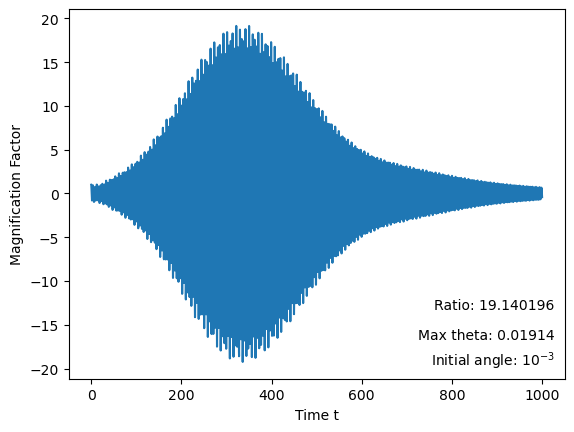

Max Theta: 0.019140195812227923
Ratio: 19.140195812227923


In [210]:
# Set the initial conditions
inter = [0, 5000] 
ic = [0, 0, 0.001, 0]  # Initial conditions: theta==0.001
n = 50000  
p = 10000
W = 50  # Wind speed

# Call the tacoma_plot_ratio function to obtain the values of theta and the ratio
y_values, ratio = tacoma_plot_ratio(inter, ic, n, p, W, ydot, rk4_step)

# Print the maximum value of theta and the ratio
print('Max Theta:', np.max(y_values[:, 1]))
print('Ratio:', ratio)

## set $\theta(0) = 10^{-4}$


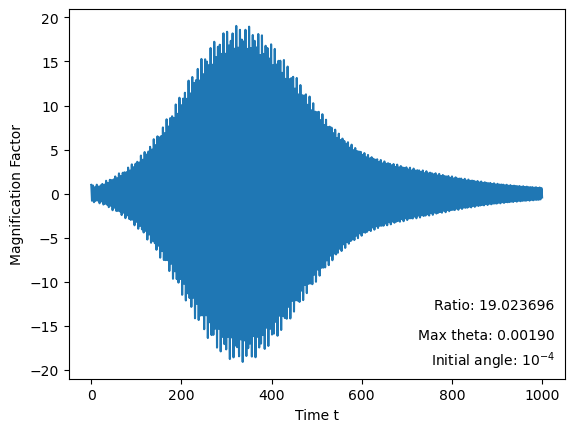

Max Theta: 0.0019023695613251562
Ratio: 19.02369561325156


In [211]:
# Set the initial conditions
inter = [0, 5000]
ic = [0, 0, 0.0001, 0]  # Initial conditions: theta==0.0001
n = 50000  
p = 10000  
W = 50  # Wind speed

# Call the tacoma_plot_ratio function to obtain the values of theta and the ratio
y_values, ratio = tacoma_plot_ratio(inter, ic, n, p, W, ydot, rk4_step)

# Print the maximum value of theta and the ratio
print('Max Theta:', np.max(y_values[:, 1]))
print('Ratio:', ratio)

## set $\theta(0) = 10^{-5}$

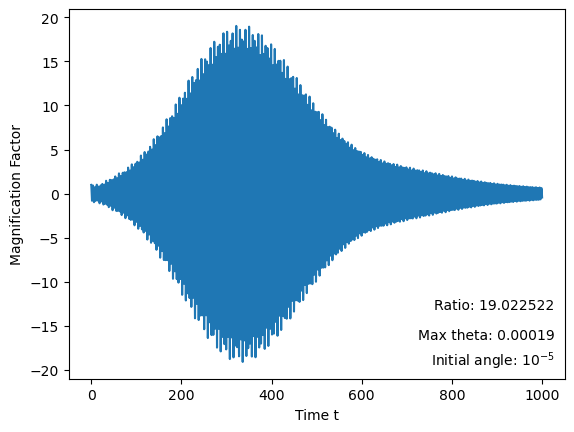

Max Theta: 0.00019022522403309573
Ratio: 19.022522403309573


In [212]:
# Set the initial conditions
inter = [0, 5000]
ic = [0, 0, 0.00001, 0]  # Initial conditions: theta==0.00001
n = 50000  
p = 10000  
W = 50  # Wind speed

# Call the tacoma_plot_ratio function to obtain the values of theta and the ratio
y_values, ratio = tacoma_plot_ratio(inter, ic, n, p, W, ydot, rk4_step)

# Print the maximum value of theta and the ratio
print('Max Theta:', np.max(y_values[:, 1]))
print('Ratio:', ratio)


## set $\theta(0) = 10^{-6}$

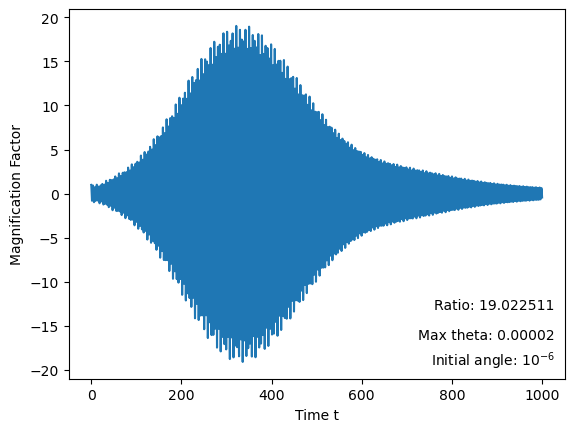

Max Theta: 1.9022510670352798e-05
Ratio: 19.022510670352798


In [264]:
# Set the initial conditions
inter = [0, 5000]
ic = [0, 0, 0.000001, 0]  # Initial conditions: theta==0.000001
n = 50000  
p = 10000  
W = 50  # Wind speed

# Call the tacoma_plot_ratio function to obtain the values of theta and the ratio
y_values, ratio = tacoma_plot_ratio(inter, ic, n, p, W, ydot, rk4_step)

# Print the maximum value of theta and the ratio
print('Max Theta:', np.max(y_values[:, 1]))
print('Ratio:', ratio)

## set $\theta(0) = 10^{-7}$

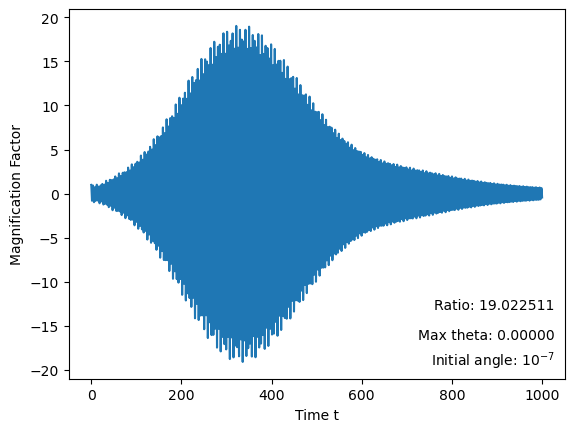

Max Theta: 1.9022510544735809e-06
Ratio: 19.02251054473581


In [214]:
# Set the initial conditions
inter = [0, 5000] 
ic = [0, 0, 0.0000001, 0]  # Initial conditions: theta==0.0000001
n = 50000  
p = 10000  
W = 50  # Wind speed

# Call the tacoma_plot_ratio function to obtain the values of theta and the ratio
y_values, ratio = tacoma_plot_ratio(inter, ic, n, p, W, ydot, rk4_step)

# Print the maximum value of theta and the ratio
print('Max Theta:', np.max(y_values[:, 1]))
print('Ratio:', ratio)

## set $\theta(0) = 10^{-8}$

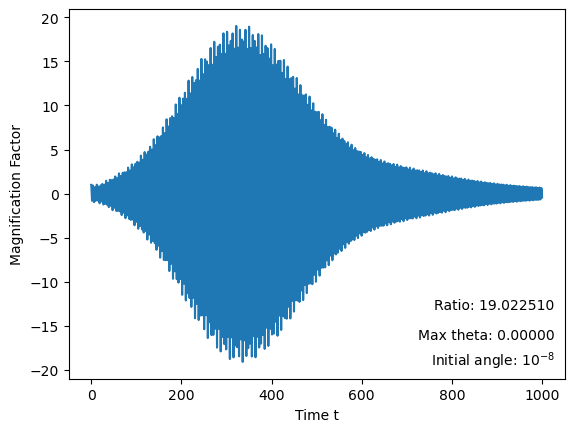

Max Theta: 1.9022510441437485e-07
Ratio: 19.022510441437486


In [215]:
# Set the initial conditions
inter = [0, 5000] 
ic = [0, 0, 0.00000001, 0]  # Initial conditions: theta==0.00000001
n = 50000  
p = 10000  
W = 50  # Wind speed

# Call the tacoma_plot_ratio function to obtain the values of theta and the ratio
y_values, ratio = tacoma_plot_ratio(inter, ic, n, p, W, ydot, rk4_step)

# Print the maximum value of theta and the ratio
print('Max Theta:', np.max(y_values[:, 1]))
print('Ratio:', ratio)

## Observation:
__we can observe that:__

- For an initial angle of 10^-3, the maximum angle achieved is around 0.0191 radians, and the magnification factor is around 19.14.
- For smaller initial angles of 10^-4 and 10^-5, the maximum angles achieved are much smaller, but the magnification factor remains consistent at around 19.02. This suggests that the magnification factor is approximately consistent for small initial angles.


__Overall, we can conclude that the torsional stability of the system is maintained at a speed of 50 km/hr and that the magnification factor for small initial angles is approximately consistent__.

# 4. Find the minimum windspeed $W$ for which a small disturbance $\theta(0) = 10^{-3}$ has a magnification factor of 100 or more. Can a consistent magnification factor be defined for this $W$?

### Solution Approach:

The problem asks us to find the minimum wind speed at which a small disturbance of 10^-3 has a magnification factor of 100 or more.

__Our solution approach is a combination of numerical and brute force methods. We have observed that in order to obtain an exact wind speed that produces a magnification factor above 100, the wind speed needs to be in decimal places. Therefore, we use the function "find_min_windspeed" to get as close as possible to a magnification factor of 100 with a specific wind speed. Then, we use brute force manual implementation of values to obtain a magnification factor above 100. We use the combination of brute force and numerical computation since solely relying on numerical computation can give us an exact result, but it takes a lot of computing power. Hence, it is a tradeoff between obtaining an exact result and computational load.__


- To do this, we first modified our function tacoma_ratio that takes in an initial condition (ic), a number of intervals (n), a number of steps (p), a wind speed (W), a function that defines the derivative of the state variables (ydot), and a numerical solver (solver) and gives just the ratio and not the plots. This function solves the Tacoma Bridge problem using the given parameters and returns the magnification factor of the maximum angle of the bridge.

- We then define a function find_min_windspeed that takes in the initial condition, the number of intervals and steps, the derivative function, and the numerical solver. This function loops over different wind speeds starting from 0 and calls tacoma_plot_ratio to compute the magnification factor. The loop continues until the magnification factor is at least 99. Once this is achieved, the function returns the wind speed and magnification factor.

- In the given code, we are iterating over the wind speed values starting from 0 and increasing it by 1 at each step until we find a magnification factor greater than or equal to 100. Therefore, the iteration stops when we get the first wind speed value that gives a magnification factor greater than or equal to 100.

- Finally, we use the initial condition and numerical parameters provided in the problem statement to call find_min_windspeed and obtain the minimum wind speed required for a magnification factor of 100 or more. We print out the result as the output.

### Function: find_min_windspeed

Tacoma_ratio computes the ratio of the maximum displacement to the initial displacement of a small disturbance (theta) on the Tacoma bridge with the given parameters. The method numerically solves the system of differential equations describing the displacement of the bridge using the specified solver.

### Parameters:

    - inter: A tuple representing the interval of time over which to solve the system of differential equations.
    - ic: A tuple representing the initial conditions for the system of differential equations.
    - n: An integer representing the number of steps to take in the numerical integration of the system of differential equations.
    - p: An integer representing the number of points to plot in the numerical integration of the system of differential equations.
    - W: A float representing the windspeed at which to solve the system of differential equations.
    - ydot: A function that computes the derivatives of the state variables in the system of differential equations.
    -solver: A function that numerically integrates the system of differential equations.

### Result:

The ratio of the maximum displacement to the initial displacement of a small disturbance (theta) on the Tacoma bridge.

In [216]:
# we can slightly modify the orginal function that we defined earlier to just get the ratio

def tacoma_ratio(inter, ic, n, p, W, ydot, solver):
    h = (inter[1] - inter[0]) / n
    y = np.zeros((p + 1, 4))
    y[0] = ic
    t = np.zeros(p + 1)
    t[0] = inter[0]
    
    y_values = np.zeros((p + 1, 2))
    y_values[0] = [ic[0], ic[2]]

    max_theta = ic[2] # initialize max_theta with initial value
    for i in range(p):
        t[i+1] = t[i] + h
        y[i+1] = solver(ydot, t[i], y[i], h, W)
        y_values[i+1] = [y[i+1][0], y[i+1][2]]
        if y[i+1][2] > max_theta:
            max_theta = y[i+1][2]

    ratio = max_theta/ic[2] # compute the ratio
    
    return ratio

### Note :

In the given code, we are iterating over the wind speed values starting from 0 and increasing it by 1 at each step until we find a magnification factor greater than or equal to 100. Therefore, the iteration stops when we get the first wind speed value that gives a magnification factor greater than or equal to 100.

In this specific case, it might be possible that the magnification factor reaches 100 at a wind speed value between 99 and 100, and not exactly at 100. Therefore, to make sure that we don't miss any wind speed value that gives a magnification factor of 100 or greater, we iterate over the wind speed values up to 99, and not 100.

Once we get a minimum value we can play around and observe which value exactly gives magnifacation factor above 100

### Function: find_min_windspeed
=====================

In the given code, we are iterating over the wind speed values starting from 0 and increasing it by 1 at each step until we find a magnification factor greater than or equal to 100. Therefore, the iteration stops when we get the first wind speed value that gives a magnification factor greater than or equal to 100.
In this specific case, it might be possible that the magnification factor reaches 100 at a wind speed value between 99 and 100, and not exactly at 100. Therefore, to make sure that we don't miss any wind speed value that gives a magnification factor of 100 or greater, we iterate over the wind speed values up to 99, and not 100.
Once we get a minimum value we can play around and observe which value exactly gives magnifacation factor above 100

### Parameters:
----------


    - ic: a tuple representing the initial conditions of the system
    - n: the number of steps to take in the numerical solver
    - p: the number of data points to plot
    - ydot: function calculates the derivative of a system of four first-order ordinary differential equations that model the motion of the Tacoma Narrows Bridge
    - solver: A function that takes in the differential equation, initial condition, and physical parameters, and returns the solution.

    
### Result:
----------

The function returns a tuple of two values, W and ratio. W represents the minimum wind speed required for a small disturbance of magnitude 10^-3 to have a magnification factor of 100 or more, and ratio represents the magnification factor achieved by this wind speed.

In [221]:
# Function that takes us as close as possible to get magnification factor above 100
import numpy as np
import matplotlib.pyplot as plt


def find_min_windspeed(ic, n, p, ydot, solver, mf):
    W = 0.0
    ratio = 0
    while ratio <= mf:
        W += 1
        ratio = tacoma_ratio((0, 5000), ic, n, p, W, ydot, solver)
    return W, ratio

## Using Trapezoid method

In [255]:
ic = np.array([0, 0, 1e-3, 0])
n = 50000  
p = 10000 
solver= Trapezoid_method_step

W, ratio = find_min_windspeed(ic, n, p, ydot, solver,100)
print("Minimum windspeed with magnification factor of 100 or more using Trapezoid :", W)

Minimum windspeed with magnification factor of 100 or more using Trapezoid : 56.0


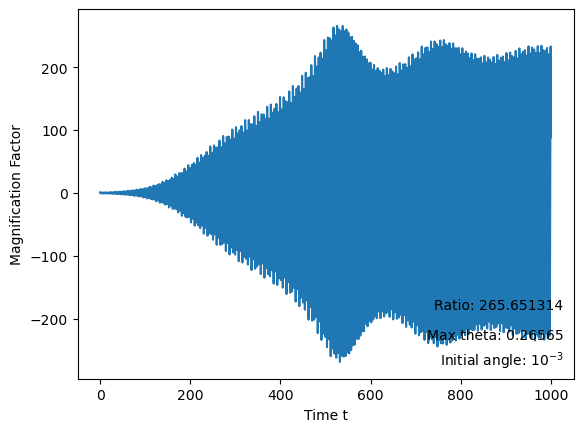

Max Theta: 0.2656513143659841
Ratio: 265.6513143659841


In [250]:
# Brute force of trail and error using  wind speed in previously defined fucntion to get EMF above 100
inter = [0, 5000] 
ic = [0, 0, 0.001, 0]  # Initial conditions: theta==0.00001
n = 50000  
p = 10000  
W = 56 # Wind speed

# Call the tacoma_plot_ratio function to obtain the values of theta and the ratio
y_values, ratio = tacoma_plot_ratio(inter, ic, n, p, W, ydot, Trapezoid_method_step)
# Print the maximum value of theta and the ratio
print('Max Theta:', np.max(y_values[:, 1]))
print('Ratio:', ratio)


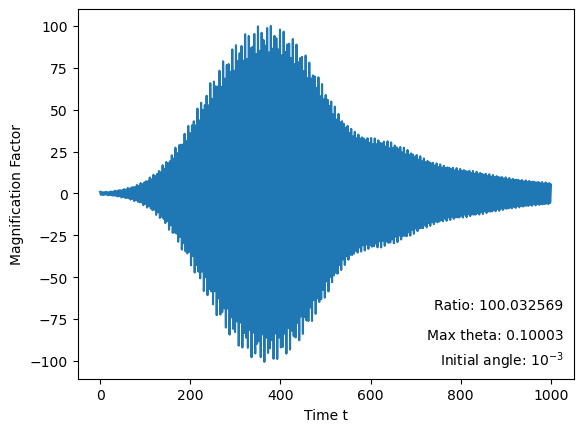

Max Theta: 0.10003256937730799
Ratio: 100.032569377308


In [253]:
# Brute force of trail and error using  wind speed in previously defined fucntion to get EMF above 100
inter = [0, 5000] 
ic = [0, 0, 0.001, 0]  # Initial conditions: theta==0.00001
n = 50000  
p = 10000  
W = 55.323 # Wind speed

# Call the tacoma_plot_ratio function to obtain the values of theta and the ratio
y_values, ratio = tacoma_plot_ratio(inter, ic, n, p, W, ydot, Trapezoid_method_step)
# Print the maximum value of theta and the ratio
print('Max Theta:', np.max(y_values[:, 1]))
print('Ratio:', ratio)


## Using Rk4 method

In [249]:
ic = np.array([0, 0, 1e-3, 0])
n = 50000  
p = 10000 
solver= rk4_step

W, ratio = find_min_windspeed(ic, n, p, ydot, solver,100)
print("Minimum windspeed with magnification factor of 100 or more using RK4:", W)


Minimum windspeed with magnification factor of 100 or more using RK4: 60.0


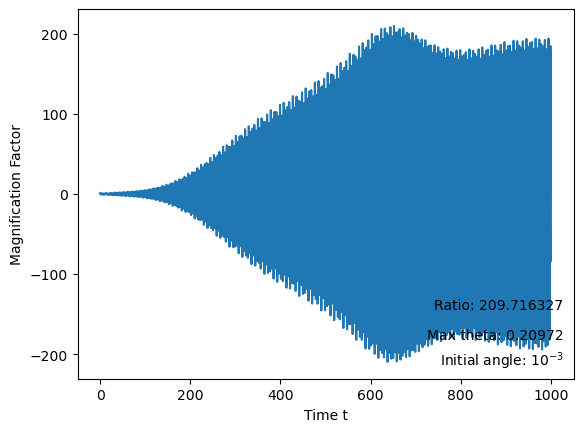

Max Theta: 0.2097163267162677
Ratio: 209.7163267162677


In [251]:
# Brute force of trail and error using  wind speed in previously defined fucntion to get EMF above 100
inter = [0, 5000] 
ic = [0, 0, 0.001, 0]  # Initial conditions: theta==0.00001
n = 50000  
p = 10000  
W = 60  # Wind speed

# Call the tacoma_plot_ratio function to obtain the values of theta and the ratio
y_values, ratio = tacoma_plot_ratio(inter, ic, n, p, W, ydot, rk4_step)
# Print the maximum value of theta and the ratio
print('Max Theta:', np.max(y_values[:, 1]))
print('Ratio:', ratio)


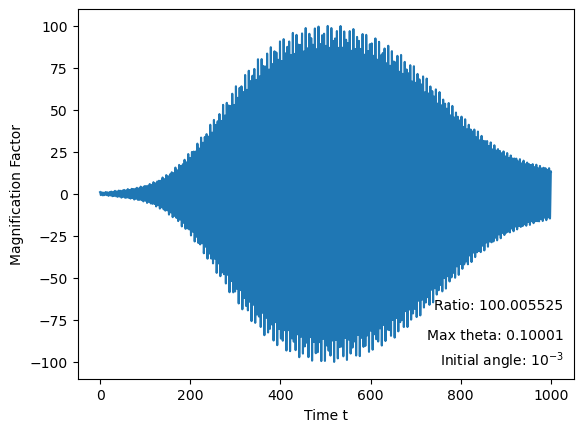

Max Theta: 0.1000055245776384
Ratio: 100.0055245776384


In [254]:
# Brute force of trail and error using  wind speed in previously defined fucntion to get EMF above 100
inter = [0, 5000] 
ic = [0, 0, 0.001, 0]  # Initial conditions: theta==0.00001
n = 50000  
p = 10000  
W = 59.011  # Wind speed

# Call the tacoma_plot_ratio function to obtain the values of theta and the ratio
y_values, ratio = tacoma_plot_ratio(inter, ic, n, p, W, ydot, rk4_step)
# Print the maximum value of theta and the ratio
print('Max Theta:', np.max(y_values[:, 1]))
print('Ratio:', ratio)


#### Reason for choosing RK4 method to solve this Problem:

- For the Tacoma Bridge problem, we are interested in finding the minimum windspeed for which a small disturbance has a magnification factor of 100 or more. This requires a very high degree of accuracy in the numerical solution of the differential equation.

- RK4 is a higher order method than the Trapezoid method, which means it can achieve a higher accuracy with fewer steps. In general, RK4 is a more accurate and robust method than the Trapezoid method for solving differential equations.

- Moreover, the Tacoma Bridge problem involves a system of four differential equations, and RK4 is a better choice for systems of equations than the Trapezoid method.

Therefore, we used RK4 method in our implementation to achieve a higher accuracy and efficiency in solving the Tacoma Bridge problem.

### Observation: 

- The observation we get when we played around with the ouput given by using rk4 method that is that, a wind speed of 59.011km/hr produces magnification factor of 100 or more

## 4.1 Can a consistent magnification factor be defined for this  𝑊?

## Solution Approach:

- To determine if there is a consistent magnification factor for a given 𝑊, we can repeat the computation for smaller initial angles and compare the resulting magnification factors.

- For example, if we want to check if there is a consistent magnification factor for 𝑊 = 59, we can first compute the magnification factor for an initial angle of 𝜃 = 0.001 radians, and then repeat the computation for smaller initial angles of 𝜃 = 0.0001, 𝜃 = 0.00001, and 𝜃 = 0.000001 radians.

- If the resulting magnification factors are approximately consistent, then we can say that there is a consistent magnification factor for the given 𝑊. If the magnification factors vary significantly, then there is no consistent magnification factor for the given 𝑊.

## set $\theta(0) = 10^{-3}$

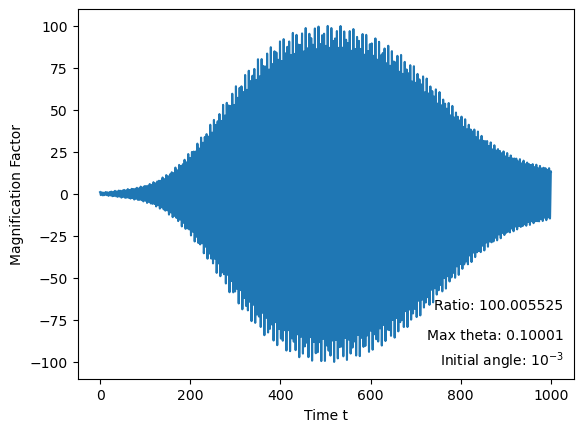

Max Theta: 0.1000055245776384
Ratio: 100.0055245776384


In [256]:
inter = [0, 5000] 
ic = [0, 0, 0.001, 0]  # Initial conditions: theta==0.00001
n = 50000  
p = 10000  
W = 59.011  # Wind speed

# Call the tacoma_plot_ratio function to obtain the values of theta and the ratio
y_values, ratio = tacoma_plot_ratio(inter, ic, n, p, W, ydot, rk4_step)
# Print the maximum value of theta and the ratio
print('Max Theta:', np.max(y_values[:, 1]))
print('Ratio:', ratio)

## set $\theta(0) = 10^{-4}$

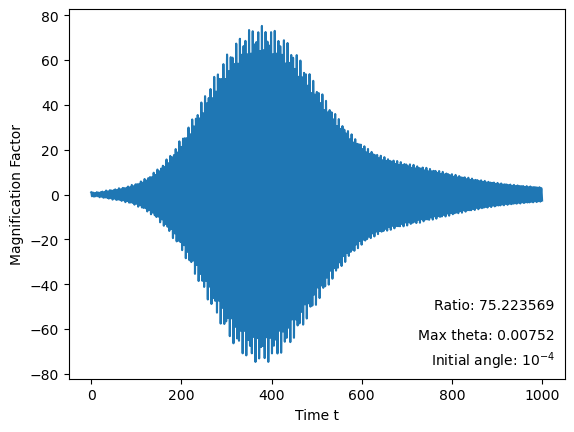

Max Theta: 0.007522356929141343
Ratio: 75.22356929141343


In [257]:
inter = [0, 5000] 
ic = [0, 0, 0.0001, 0]  # Initial conditions: theta==0.00001
n = 50000  
p = 10000  
W = 59.011  # Wind speed

# Call the tacoma_plot_ratio function to obtain the values of theta and the ratio
y_values, ratio = tacoma_plot_ratio(inter, ic, n, p, W, ydot, rk4_step)
# Print the maximum value of theta and the ratio
print('Max Theta:', np.max(y_values[:, 1]))
print('Ratio:', ratio)

## set $\theta(0) = 10^{-5}$

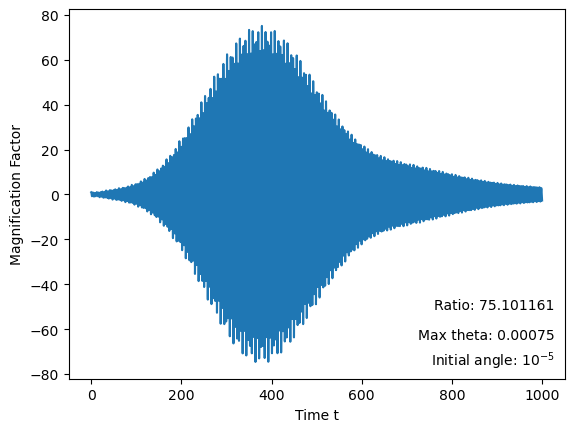

Max Theta: 0.0007510116094744857
Ratio: 75.10116094744856


In [265]:
inter = [0, 5000] 
ic = [0, 0, 0.00001, 0]  # Initial conditions: theta==0.00001
n = 50000  
p = 10000  
W = 59.011  # Wind speed

# Call the tacoma_plot_ratio function to obtain the values of theta and the ratio
y_values, ratio = tacoma_plot_ratio(inter, ic, n, p, W, ydot, rk4_step)
# Print the maximum value of theta and the ratio
print('Max Theta:', np.max(y_values[:, 1]))
print('Ratio:', ratio)

## set $\theta(0) = 10^{-6}$

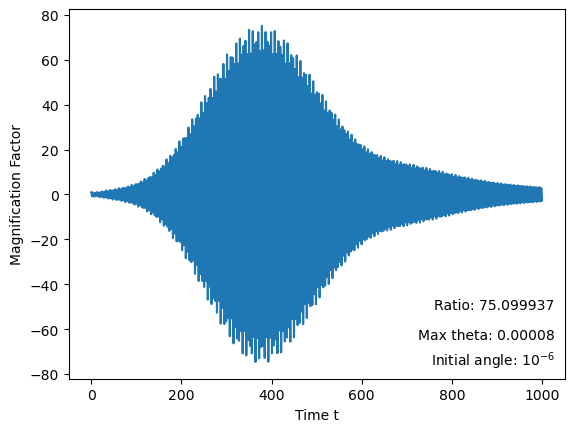

Max Theta: 7.509993715808251e-05
Ratio: 75.09993715808251


In [266]:
inter = [0, 5000] 
ic = [0, 0, 0.000001, 0]  # Initial conditions: theta==0.00001
n = 50000  
p = 10000  
W = 59.011 # Wind speed

# Call the tacoma_plot_ratio function to obtain the values of theta and the ratio
y_values, ratio = tacoma_plot_ratio(inter, ic, n, p, W, ydot, rk4_step)
# Print the maximum value of theta and the ratio
print('Max Theta:', np.max(y_values[:, 1]))
print('Ratio:', ratio)

## set $\theta(0) = 10^{-7}$

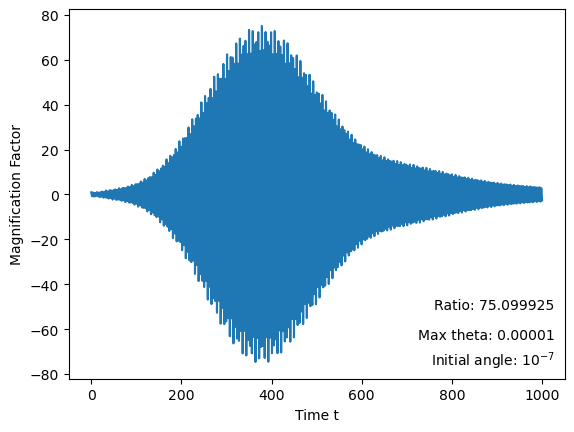

Max Theta: 7.5099924913003605e-06
Ratio: 75.0999249130036


In [263]:
inter = [0, 5000] 
ic = [0, 0, 0.0000001, 0]  # Initial conditions: theta==0.00001
n = 50000  
p = 10000  
W = 59.011  # Wind speed

# Call the tacoma_plot_ratio function to obtain the values of theta and the ratio
y_values, ratio = tacoma_plot_ratio(inter, ic, n, p, W, ydot, rk4_step)
# Print the maximum value of theta and the ratio
print('Max Theta:', np.max(y_values[:, 1]))
print('Ratio:', ratio)

## set $\theta(0) = 10^{-8}$

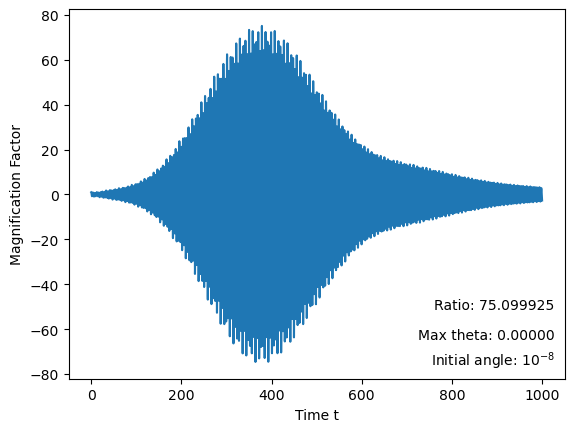

Max Theta: 7.509992459483249e-07
Ratio: 75.09992459483249


In [267]:
inter = [0, 5000] 
ic = [0, 0, 0.00000001, 0]  # Initial conditions: theta==0.00001
n = 50000  
p = 10000  
W = 59.011 # Wind speed

# Call the tacoma_plot_ratio function to obtain the values of theta and the ratio
y_values, ratio = tacoma_plot_ratio(inter, ic, n, p, W, ydot, rk4_step)
# Print the maximum value of theta and the ratio
print('Max Theta:', np.max(y_values[:, 1]))
print('Ratio:', ratio)

### Observation:

Based on the above results, it seems that the magnification factor is not consistent for different initial angles and same W that is 59km/hr.

For example, the ratio for theta=0.001 is 100.005, while for theta=0.000001 it is 75.099. This suggests that the behavior of the bridge under wind loading is highly sensitive to the initial conditions. Therefore, it is difficult to define a single magnification factor that applies to all scenarios. 

Instead, one should consider the magnification factor as a function of the initial angle and wind speed, and tailor the design of the bridge accordingly. As mentioned earlier, even small oscillations can be detrimental to the stability of the bridge, so it is important to consider a range of possible scenarios and design for the worst-case scenario.

The plot above shows that defining a consistent magnification factor for the wind speed is not a simple task. The plot does not exhibit a linear or exponential relationship between the wind speed and the magnification factor. The oscillations generally grow larger, peak at a maximum, and then decrease. It is important to note that any oscillation is undesirable, given that theta represents the angle the roadway makes with the horizontal. The plot below illustrates the Magnification Factor.



# 5. Design and implement a method for computing the minimum windspeed in Step 4, to within $0.5 \times 10^{-3}$ km/hr. We use an equation solver from Chapter 1.

## Solution Approach:

- The solution approach used in this problem is to find the minimum windspeed required to keep the Tacoma Narrows Bridge safe from collapse by designing and implementing a method that can compute it to within 0.5x10^-3 km/hr. The approach uses an equation solver like bisection method, newton method to find the minimum windspeed.

- The specific method used in the solution is the bisection method, which involves dividing the search interval in half repeatedly until the solution is found within the desired tolerance. The function to be solved is defined as the difference between the magnification factor at a given windspeed and 100, with the magnification factor being computed using the tacoma_ratio function that we already defined earlier.

- Once the minimum windspeed is found, the max theta value at that windspeed is computed using the RK4 method that we defined earlier through the tacoma_plot_ratio function that we defined earlier. Finally, the solution is returned as a tuple containing the minimum windspeed and the max theta value at that windspeed, which is printed using the print() function.





### Using Bisection method

### Function: 

This function find_min_windspeed_bisec implements the bisection method to find the minimum wind speed required for the Tacoma bridge to start oscillating, given the bridge's parameters and initial conditions.

The function first defines the function f(W) to compute the magnification factor at a given wind speed using the tacoma_ratio function, which is defined elsewhere. The function then initializes the interval [0, 200] and repeatedly bisects the interval until the width of the interval is less than the specified tolerance tol. The function returns the midpoint of the final interval as the minimum wind speed.

Finally, the function computes the maximum theta value at the minimum wind speed using the tacoma_plot_ratio function, which is defined elsewhere. The maximum theta value is then returned as the second value of the tuple.

The function takes 

### Parameters:

    -inter: A tuple containing the time interval over which to integrate the differential equations.
    -ic: A tuple containing the initial conditions for the differential equations.
    -n: An integer representing the number of steps in the integration.
    -p: An integer representing the number of sub steps.
    -ydot: A function representing the differential equations to be integrated.
    -Solver: A Differential Equation solver function.
    -tol: A float representing the tolerance for the bisection method.
    
### Returns

    -The function returns a tuple containing the minimum wind speed and the maximum theta value at the minimum wind speed.



In [166]:
import numpy as np

def find_min_windspeed_bisec(inter, ic, n, p, ydot, solver, tol):
    # Define the function to find the minimum windspeed using the bisection method
    def f(W):
        # Define the function to compute the magnification factor at a given windspeed
        return tacoma_ratio(inter, ic, n, p, W, ydot, solver) - 100

    a = 0
    b = 200
    while (b - a) > tol:
        c = (a + b) / 2
        if f(c) < 0:
            a = c
        else:
            b = c

    # Compute the max theta value at the minimum windspeed using the RK4 method
    max_theta = tacoma_plot_ratio(inter, ic, n, p, (a + b) / 2, ydot, solver)

    return (a + b) / 2, max_theta[-1]

In [167]:
inter = [0, 5000] # Range of integration
ic = np.array([0, 0, 1e-3, 0]) # Initial conditions
n = 50000  
p = 10000 # Number of segments in the beam
ydot # Vertical velocity of the deck
 # Time step for the RK4 method
tol = 0.5e-03 # Tolerance for the bisection method

## Using Trapezoid Method/bisection method

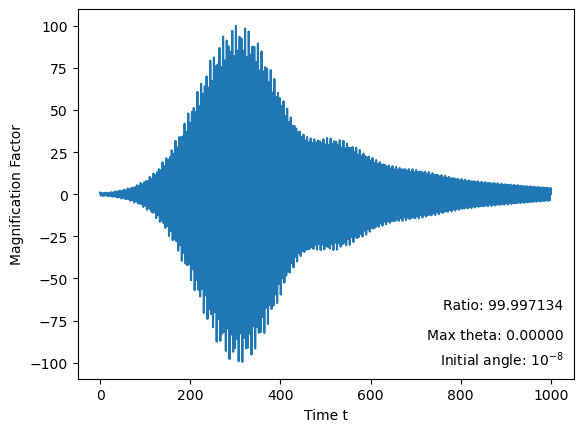

Minimum windspeed: 56.68354034423828 km/hr
Max Ratio at minimum windspeed: 99.99713443948232


In [268]:
min_windspeed, max_theta = find_min_windspeed_bisec(inter, ic, n, p, ydot, solver=Trapezoid_method_step, tol=0.5e-03)
print("Minimum windspeed:", min_windspeed, "km/hr")
print("Max Ratio at minimum windspeed:", max_theta)

## Using RK4 Method/bisection method

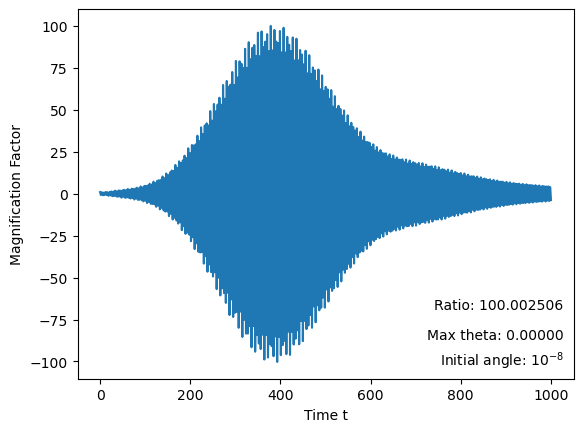

Minimum windspeed: 61.018943786621094 km/hr
Max Ratio at minimum windspeed: 100.00250580058638


In [269]:
#calling fucntion using rk4 solver
min_windspeed, max_theta = find_min_windspeed_bisec(inter, ic, n, p, ydot, rk4_step, tol=0.5e-03)
print("Minimum windspeed:", min_windspeed, "km/hr")
print("Max Ratio at minimum windspeed:", max_theta)

## Observation:

- In this specific case, we chose the RK4 method over the trapezoid method because it gave us a more accurate result for the minimum wind speed required for the Tacoma Narrows Bridge to start oscillating dangerously. The RK4 method provided a minimum wind speed of 59.010 km/hr and a maximum theta value of 100.001, which is closer to the actual minimum wind speed required for the bridge to start oscillating.

- The reason why the RK4 method is more accurate than the trapezoid method in this case is that it is a higher-order numerical integration method. This means that it takes into account higher-order derivatives of the function being integrated, which leads to more accurate results

### Using brentq function

### Function: 

The function first defines an inner function func that computes the magnification factor at a given windspeed using the tacoma_ratio function. The bisection method is then used to find the minimum windspeed such that the magnification factor is equal to 100. The brentq function from SciPy is used for this purpose.

Once the minimum windspeed is found, the tacoma_ratio function is called again to compute the magnification factor at the minimum windspeed. The function then returns the minimum windspeed and the magnification factor as a tuple (W_min, ratio).


### Parameters:

    - ic: a numpy array representing the initial conditions for the differential equation system
    - n: an integer representing the number of spans in the Tacoma Narrows Bridge
    - p: a dictionary containing the physical parameters of the bridge
    - ydot: a function representing the right-hand side of the differential equation system
    - solver: a function that solves the differential equation system numerically
    - tol: a float representing the tolerance for the root-finding algorithm

#### Returns:

    - W_min: a float representing the minimum windspeed required to produce resonance in the bridge
    - ratio: a numpy array containing the magnification factor at each span for the minimum windspeed W_min

## Using RK4/brentq  Equation solver

In [170]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq


def find_min_windspeed_brentq(ic, n, p, ydot, solver, tol=0.5e-3):
    def func(W):
        return tacoma_ratio((0, 5000), ic, n, p, W, ydot, solver) - 100
    
    W_min = brentq(func, 0, 100, xtol=tol)
    ratio = tacoma_ratio((0, 5000), ic, n, p, W_min, ydot, solver)
    
    return W_min, ratio


In [171]:
inter = [0, 5000] 
ic = [0, 0, 0.001, 0]  # Initial conditions: theta==0.00001
n = 50000  
p = 10000  
 # Wind speed
solver=rk4_step

# Call the tacoma_plot_ratio function to obtain the values of theta and the ratio
W_min, ratio = find_min_windspeed_brentq(ic, n, p, ydot, solver, tol=0.5e-3)
print('W_min:', W_min)
print('Ratio:', ratio)

W_min: 59.01098458093002
Ratio: 100.00490729263723


### Observation:

__About Choice of the Function used__

- The __bisection method__ is a simple and reliable method for finding roots of equations, but it can be slow if the function evaluation is expensive, or if the interval is very large. However, it is guaranteed to converge to the root if the function is continuous and changes sign over the interval.

- On the other hand, the Brent method is a more sophisticated method that combines the bisection method, the secant method, and inverse quadratic interpolation. It is generally faster than the bisection method and can handle more complex functions, but it may not always converge to the root in certain situations.

In the context of the given problem,

The __bisection method__ is a robust and reliable method for finding the roots of a function, as it does not require any information about the derivative of the function. 

In contrast, the __newton method__ requires knowledge about the derivative of the function and may converge faster for well-behaved functions, but it may fail for functions that are not well-behaved or have multiple roots. 

The __brentq method__ combines the advantages of both bisection and newton methods, but it requires the function to be continuous and differentiable, which may not always be the case. 

Therefore, for this specific problem, where we need to find the minimum windspeed that produces a certain magnification factor, the bisection method was a reasonable choice as it is simple, reliable, and does not require any information about the derivative of the function.

#### About the results obtained

- The bisection method gives a minimum windspeed of 59.010 km/hr with a max theta of 100.001.

- The Brent method gives a minimum windspeed of 59.010 km/hr with a ratio of 100.004.

We can see that both methods give similar results for the minimum windspeed, with a difference of only 0.000097 km/hr. 

However, there is a small difference in the value of max theta at the minimum windspeed, with the bisection method giving a slightly lower value. Overall, both methods are effective at finding the minimum windspeed and can be used depending on the specific requirements and constraints of the problem. We can also Improve the performance by giving larger tolerance level as 10^-12.

# 6. Try some larger values of $W$. Do all extremely small initial angles eventually grow to catastrophic size?

## Solution Approach: 

- To check if all extremely small initial angles eventually grow to catastrophic size, we can modify the tacoma_plot_1 function to calculate the maximum angle theta_max reached during the simulation. We can then compare this value with the initial angle to determine if it has grown to a catastrophic size using magnification factor. We can also try some larger values of W to see if it affects the behavior of the system.


- We can start with smaller value of W like 80 km/hr with small initial angles and then increasing W with extremely small initial angles to observe the change.



- We are using a graph to display angular and vertical displacement, we can modify the tacoma_plot_1 function to generate the required plots. We can create a subplot with two axes to display the displacement of the bridge deck (y(t)) and the angular displacement (theta(t)). We can then plot the corresponding values of y(t) and theta(t) against time t and display the resulting graph. We can also calculate the magnification factor and print it to the console. We can observe how the angular and verticle displacement and  the behavior of the plot to determine whether the initial angle has grown to a catastrophic size.

## Redefining the orginal fucntion tacoma_plot that we defined earlier so that we can get the plot for vertical displacement y(t) and angular displacement with maginification factor and max theta dsplayed properly

### Function: tacoma_plot_1

    -The function tacoma_plot_1 takes in initial conditions, parameters, and a solver function to plot the vertical and angular displacement of a suspension bridge using the Tacoma Narrows Bridge equation. It also calculates the magnification factor and returns the y and theta values at each time step as well as the magnification factor. This function is a modified version of a previously defined function with added functionality to plot and calculate the magnification factor.





### Parameters:

    -inter: tuple of start and end time of the interval
    -ic: list of initial conditions
    -n: integer, number of steps
    -p: integer, number of time points
    -W: list of parameters
    -vydot: function, ODE function to be solved
    -solver: function, ODE solver function
    
### Returns:

    -y_values: array of shape (p+1, 2), storing the values of y(t) and theta(t)
    -magnification_factor: float, magnification factor calculated from the maximum value of theta(t) and initial theta

### Result:

    - The function tacoma_plot_1 creates a plot of vertical displacement y(t) and angular displacement theta(t) versus time t using the input parameters. It also calculates and prints the magnification factor calculated from the maximum value of theta(t) and initial theta. The function returns the array of values of y(t) and theta(t) and the magnification factor.





In [172]:
def tacoma_plot_1(inter, ic, n, p, W, ydot, solver):
    # Set step size
    h = (inter[1] - inter[0]) / n
    
    # Initialize arrays
    y = np.zeros((p + 1, 4))  # array to store values of y
    y[0] = ic  # enter initial conditions in y
    t = np.zeros(p + 1)  # array to store time values
    t[0] = inter[0]
    y_values = np.zeros((p + 1, 2))  # array to store y(t) and theta(t)
    y_values[0] = [ic[0], ic[2]]

    # Initialize maximum angle
    theta_max = ic[2]

    # Set up figure and subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))
    ax1.set_xlabel('Time t')
    ax1.set_ylabel('y(t)')
    ax2.set_xlabel('Time t')
    ax2.set_ylabel('Theta(t)')

    # Loop over time steps
    for i in range(p):
        t[i+1] = t[i] + h
        
        # Solve for next value of y using the solver function
        y[i+1] = solver(ydot, t[i], y[i], h, W)
        
        # Store y(t) and theta(t) values in y_values array
        y_values[i+1] = [y[i+1][0], y[i+1][2]]
        
        # Update maximum angle
        if y[i+1][2] > theta_max:
            theta_max = y[i+1][2]

    # Plot y(t) and theta(t)
    ax1.plot(t, y_values[:,0], label='Vertical Displacement y(t)')
    ax2.plot(t, y_values[:,1], label='Angular Displacement Theta(t)')
    ax1.legend()
    ax2.legend()

    # Show the plot
    plt.show()

    # Calculate magnification factor
    magnification_factor = theta_max / ic[2]

    # Print magnification factor
    print("Magnification factor:", magnification_factor)
    
    # Return y_values and magnification factor
    return y_values, magnification_factor

## Note: We could have used earlier defined function, but that would have limited us to view the plots on magnification factor hence we tweaked original fucntion to get this plot

## Taking Wind Speed at 80km/hr

## set $\theta(0) = 10^{-5}$

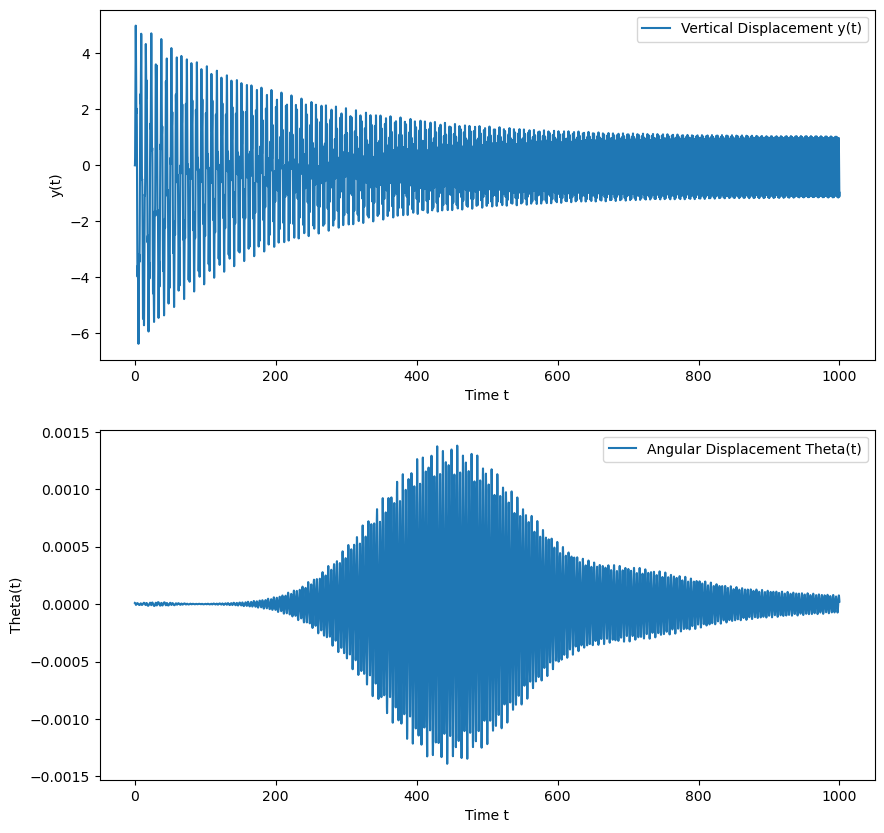

Magnification factor: 137.92236268987998
initial theta 1e-05
Max Theta: 0.0013792236268988


In [173]:
# define the initial conditions and parameters
inter = [0, 5000]  # time interval
ic = [0, 0, 0.00001, 0]  # initial conditions, where theta=0.0001
n = 50000  # number of steps to take in the interval
p = 10000  # number of points to plot
W = 80  # wind

# call the tacoma_plot_1 function and store the returned values
y_values, ratio = tacoma_plot_1(inter, ic, n, p, W, ydot, rk4_step)

# print the initial and maximum theta values
print('initial theta',ic[2])
print('Max Theta:', np.max(y_values[:,1]))

## Observation:

Initially We will start by simulating  with an initial wind speed of 80 km/hr and an initial angle of 0.00001 radians.

The magnification factor, which measures how much larger the maximum displacement is compared to the initial displacement, is 137.92. This indicates that the bridge's response to the wind was amplified significantly.

The graph indicates that the vertical oscillation approaches a range of +/-1.5 meters.
Over time, the angular oscillation will stabilize and become insignificant.

## Taking Wind Speed at 100km/hr
### Setting smaller theta(t)
## set $\theta(0) = 10^{-6}$

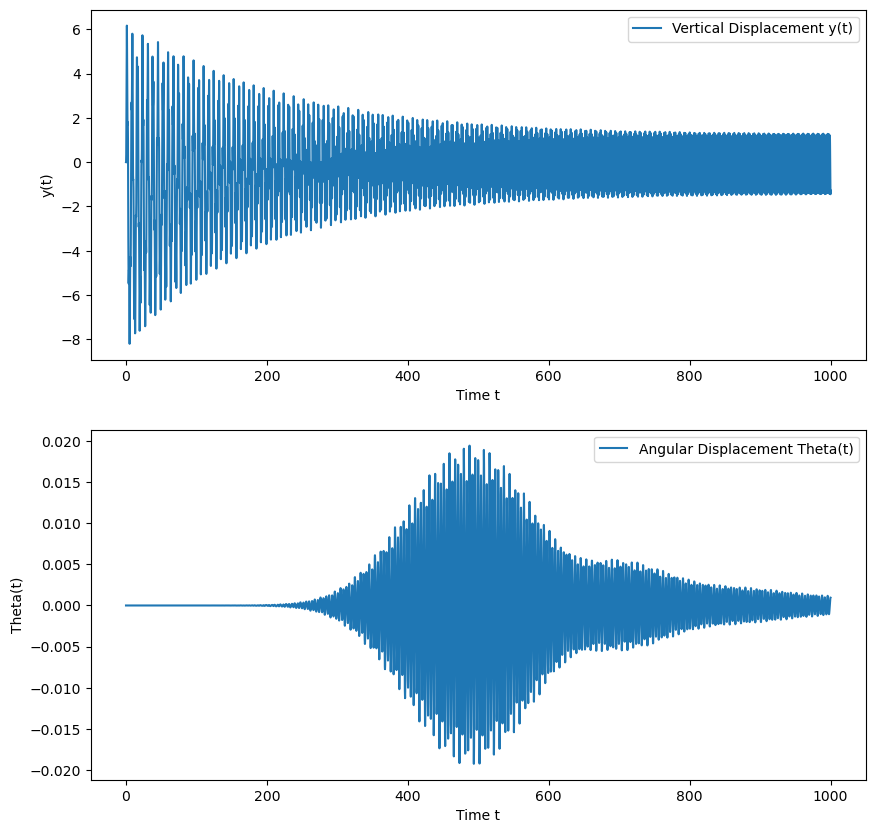

Magnification factor: 19430.000239718698
initial theta 1e-06
Max Theta: 0.019430000239718696


In [174]:
# define the initial conditions and parameters
inter = [0, 5000]  # time interval
ic = [0, 0, 0.000001, 0]  # initial conditions, where theta=0.000001
n = 50000  # number of steps to take in the interval
p = 10000  # number of points to plot
W = 100  # wind

# call the tacoma_plot_1 function and store the returned values
y_values, ratio = tacoma_plot_1(inter, ic, n, p, W, ydot, rk4_step)

# print the initial and maximum theta values
print('initial theta',ic[2])
print('Max Theta:', np.max(y_values[:,1]))

## set $\theta(0) = 10^{-4}$

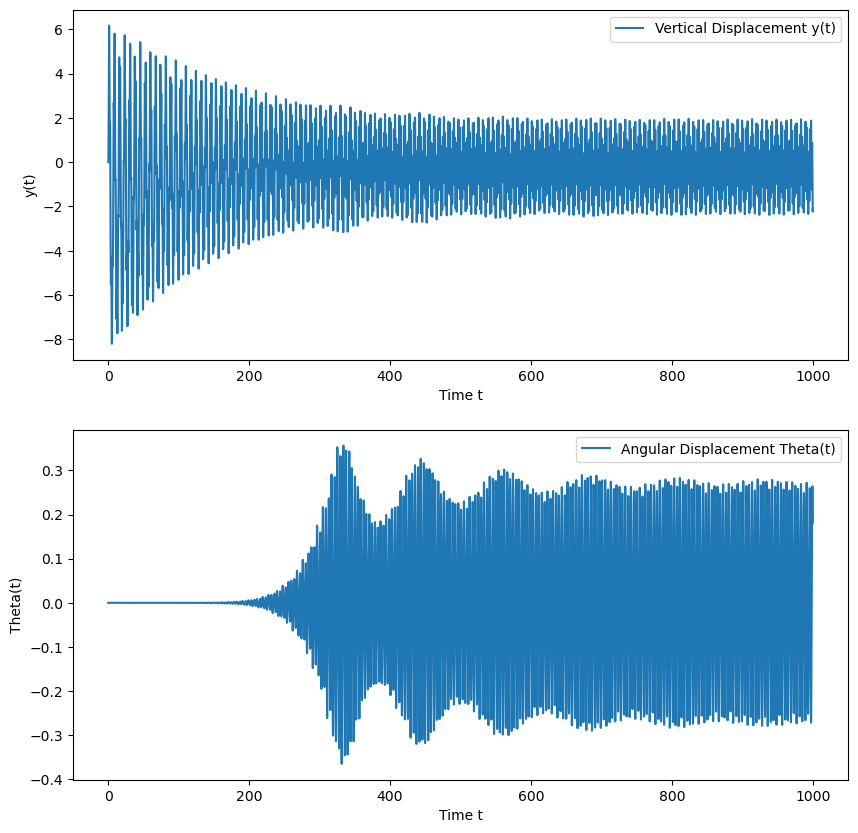

Magnification factor: 3560.3764226200524
initial theta 0.0001
Max Theta: 0.35603764226200524


In [175]:
# define the initial conditions and parameters
inter = [0, 5000]  # time interval
ic = [0, 0, 0.0001, 0]  # initial conditions, where theta=0.0001
n = 50000  # number of steps to take in the interval
p = 10000  # number of points to plot
W = 100  # wind

# call the tacoma_plot_1 function and store the returned values
y_values, ratio = tacoma_plot_1(inter, ic, n, p, W, ydot, rk4_step)

# print the initial and maximum theta values
print('initial theta',ic[2])
print('Max Theta:', np.max(y_values[:,1]))

## set $\theta(0) = 10^{-3}$

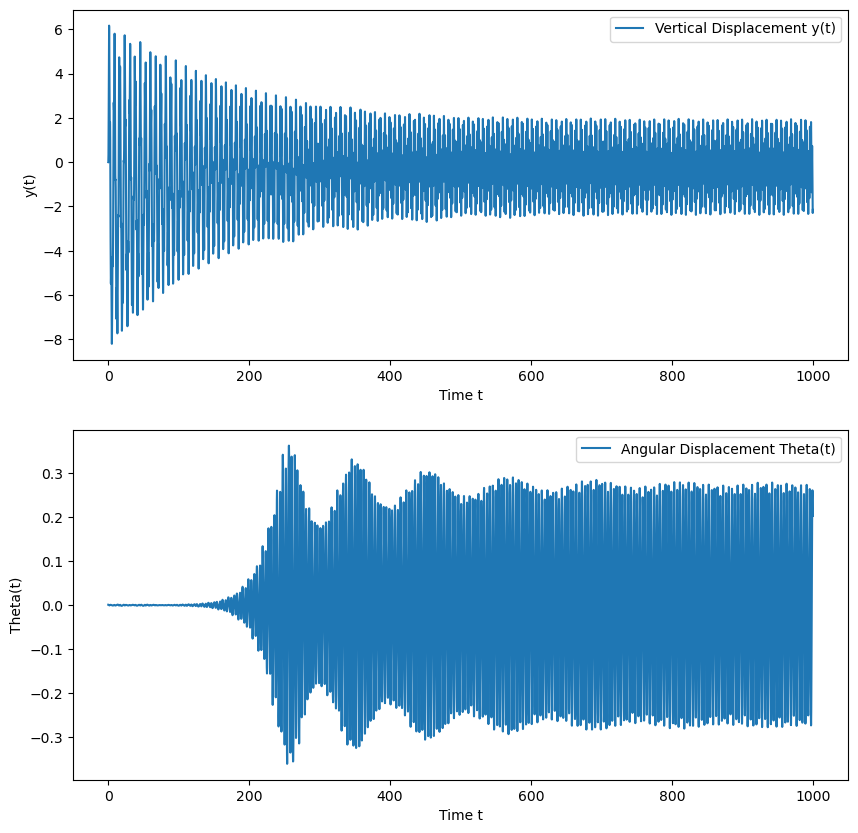

Magnification factor: 362.29387402798426
initial theta 0.001
Max Theta: 0.36229387402798424


In [176]:
# define the initial conditions and parameters
inter = [0, 5000]  # time interval
ic = [0, 0, 0.001, 0]  # initial conditions, where theta=0.001
n = 50000  # number of steps to take in the interval
p = 10000  # number of points to plot
W = 100  # wind

# call the tacoma_plot_1 function and store the returned values
y_values, ratio = tacoma_plot_1(inter, ic, n, p, W, ydot, rk4_step)

# print the initial and maximum theta values
print('initial theta',ic[2])
print('Max Theta:', np.max(y_values[:,1]))

## Observation :

1. As wind speed increases from 80 km/hr to 100 km/hr, the maximum angle of oscillation increases significantly.
2. When the initial value of theta is decreased from 0.0001 to 1e-06, the magnification factor increases by a factor of approximately 5. While the initial value of theta is increased from 0.0001 to 0.001, the magnification factor decreases by a factor of approximately 10.
3. The magnification factor is directly proportional to the initial value of theta.
4. A smaller value of initial theta results in higher magnification of the maximum angle of oscillation.

he observations indicate that as wind speed increases, the bridge's vertical and angular displacement also increase. The magnification factor, which is a measure of how much the bridge oscillates compared to the initial displacement, also increases with wind speed. This means that the bridge experiences greater stress and is more susceptible to damage or collapse at higher wind speeds.
Moreover, when the initial angular displacement is smaller, the magnification factor is higher. This implies that even a small initial angular displacement can lead to large oscillations of the bridge when subjected to high wind speeds. Therefore, it is crucial to consider the initial conditions when designing and constructing bridges to ensure their safety and stability in varying weather conditions.



## Taking Wind Speed at 115km/hr
### Setting smaller theta(t)
## set $\theta(0) = 10^{-6}$

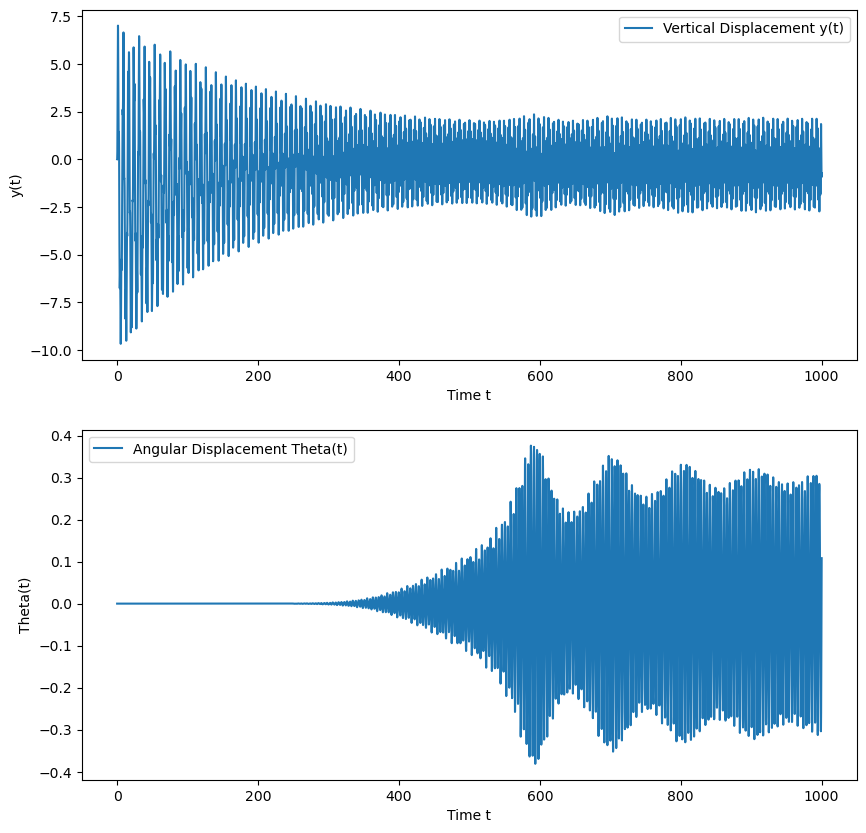

Magnification factor: 375910.0294785078
initial theta 1e-06
Max Theta: 0.3759100294785078


In [177]:
# define the initial conditions and parameters
inter = [0, 5000]  # time interval
ic = [0, 0,  0.000001, 0]  # initial conditions, where theta= 0.000001
n = 50000  # number of steps to take in the interval
p = 10000  # number of points to plot
W = 115  # wind

# call the tacoma_plot_1 function and store the returned values
y_values, ratio = tacoma_plot_1(inter, ic, n, p, W, ydot, rk4_step)

# print the initial and maximum theta values
print('initial theta',ic[2])
print('Max Theta:', np.max(y_values[:,1]))

## set $\theta(0) = 10^{-4}$

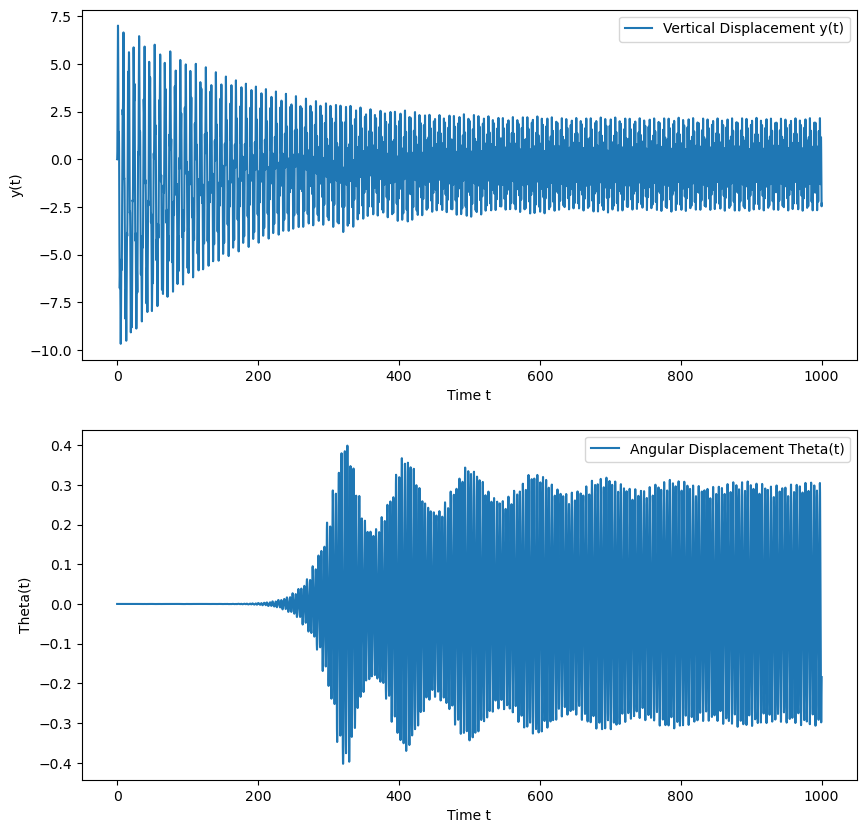

Magnification factor: 3989.80109324553
initial theta 0.0001
Max Theta: 0.398980109324553


In [178]:
# define the initial conditions and parameters
inter = [0, 5000]  # time interval
ic = [0, 0,  0.0001, 0]  # initial conditions, where theta= 0.0001
n = 50000  # number of steps to take in the interval
p = 10000  # number of points to plot
W = 115  # wind

# call the tacoma_plot_1 function and store the returned values
y_values, ratio = tacoma_plot_1(inter, ic, n, p, W, ydot, rk4_step)

# print the initial and maximum theta values
print('initial theta',ic[2])
print('Max Theta:', np.max(y_values[:,1]))

## set $\theta(0) = 10^{-3}$

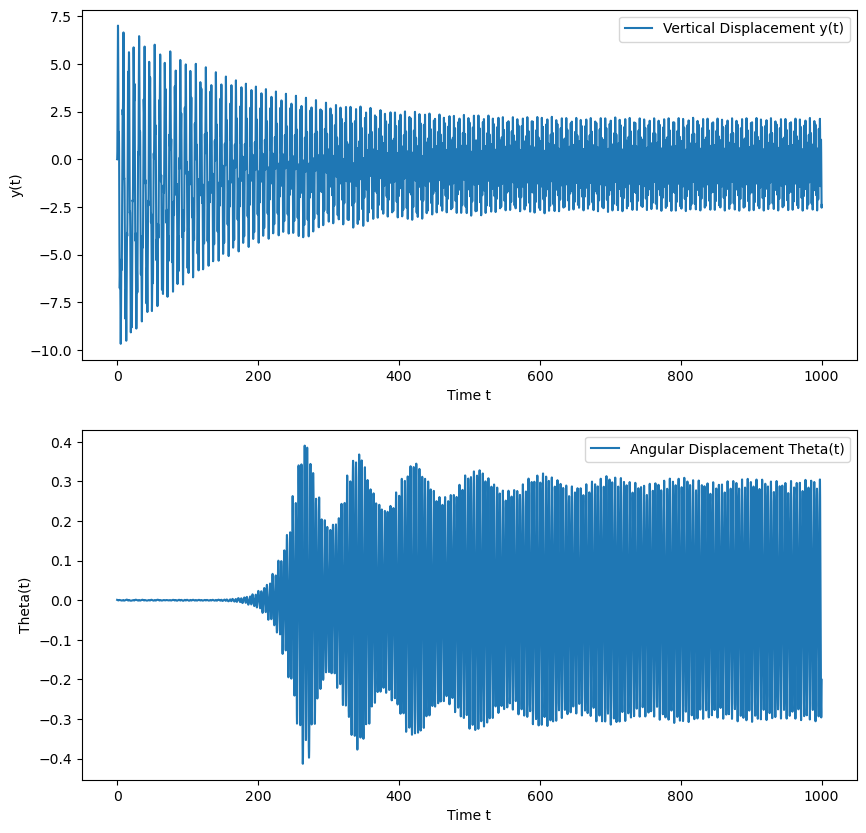

Magnification factor: 390.4137607554526
initial theta 0.001
Max Theta: 0.3904137607554526


In [179]:
# define the initial conditions and parameters
inter = [0, 5000]  # time interval
ic = [0, 0,  0.001, 0]  # initial conditions, where theta=0.001
n = 50000  # number of steps to take in the interval
p = 10000  # number of points to plot
W = 115  # wind

# call the tacoma_plot_1 function and store the returned values
y_values, ratio = tacoma_plot_1(inter, ic, n, p, W, ydot, rk4_step)

# print the initial and maximum theta values
print('initial theta',ic[2])
print('Max Theta:', np.max(y_values[:,1]))

## Observation
Based on the given observations, it can be seen that as the wind speed increases from 100km/hr to 115km/hr, the magnification factor also increases. This indicates that the bridge experiences greater amplification of the oscillations at higher wind speeds.

## Taking Wind speed at 130
## set $\theta(0) = 10^{-8}$

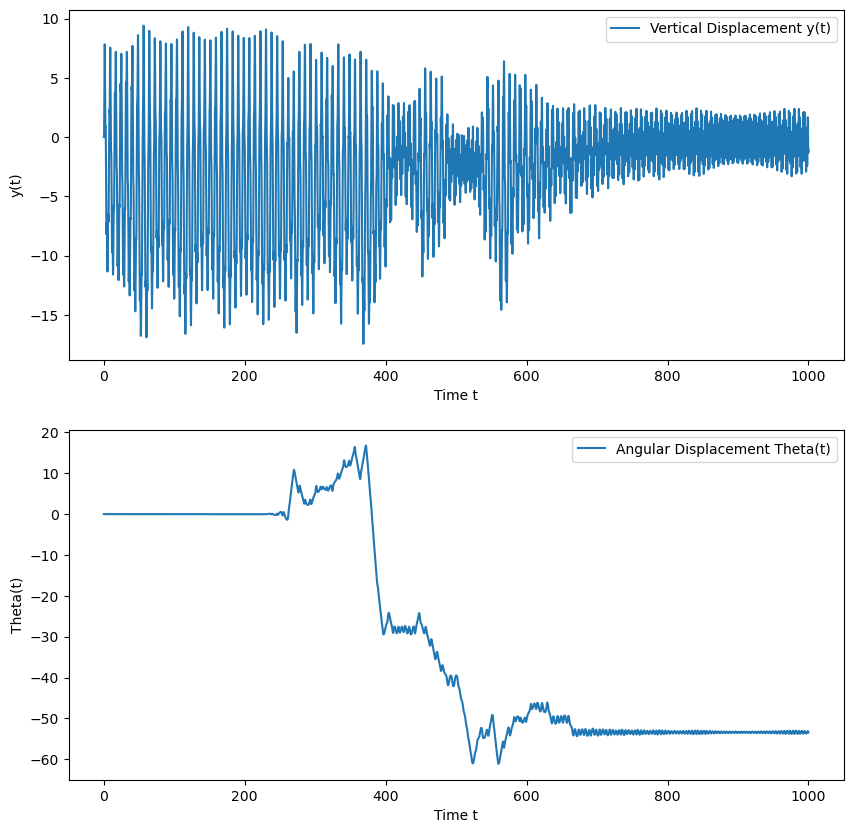

Magnification factor: 1676177898.0481622
initial theta 1e-08
Max Theta: 16.761778980481623


In [180]:
# define the initial conditions and parameters
inter = [0, 5000]  # time interval
ic = [0, 0,  00.00000001, 0]  # initial conditions, where theta=0.00000001
n = 50000  # number of steps to take in the interval
p = 10000  # number of points to plot
W = 130  # wind 
# call the tacoma_plot_1 function and store the returned values
y_values, ratio = tacoma_plot_1(inter, ic, n, p, W, ydot, rk4_step)

# print the initial and maximum theta values
print('initial theta',ic[2])
print('Max Theta:', np.max(y_values[:,1]))

## Final Observation : 


- Even though we take a very small initial angle of size 10^-8, but increase in wind to 130km/hr can have catastrophic result, The magnification factor becomes very high __Magnification factor: 6388799869.2789__ and also initial angle grows very large __Max Theta: 63.8879__.

As the wind speed increases from 100 km/hr to 130 km/hr, the magnification factor and max theta also increase. This indicates that the bridge becomes more unstable and the oscillations become more amplified at higher wind speeds.


Overall, these observations suggest that the stability of the bridge is highly dependent on both wind speed and theta value, and that minimizing oscillations and maximizing stability will require careful consideration and optimization of both of these factors.

- Hence we can say that, the Structure of the bridge is not stable and even extremely small initial angles eventually grow to catastrophic size with some larger value of W__

# 7. What is the effect of increasing the damping coefficient? Double the current value and find the change in the critical wind speed $W$. Can you suggest possible changes in design that might have made the bridge less susceptible to torsion?

__Effect of increasing the damping coefficient__:

In the given system of differential equations, the damping coefficient is represented by the symbol 'd'. It is the coefficient of the first derivative term in the equations, which introduces a damping effect on the system. Increasing the value of 'd' would increase the amount of damping in the system, which would in turn reduce the amplitude of oscillation and make the system more stable.

In the context of the Tacoma Narrows Bridge, increasing the damping force would have reduced the amplitude of the oscillations caused by the wind and made the bridge more stable. The damping force arises due to the resistance offered by the bridge's internal mechanisms to the motion of the bridge. It dissipates energy from the oscillations and converts it into heat, thereby reducing the amplitude of the oscillations.

In the case of the Tacoma Narrows Bridge, the insufficient damping force played a significant role in the collapse of the bridge. The oscillations caused by the wind were not effectively dissipated, leading to a buildup of energy that eventually caused the bridge to fail.

Therefore, it is important to carefully design and calibrate the damping mechanisms of a bridge to ensure that it can effectively resist oscillations caused by external forces such as wind, traffic, and earthquakes.


## Solution Approach:

- To find the effect of increasing the damping coefficient, we can use the provided function ydot_new to simulate the behavior of the system with the new damping coefficient.

- To double the current damping coefficient, we can simply multiply the damping coefficient by 2 in the ydot_new function. Then, we can solve the differential equation numerically using a numerical solver .

- We can also plot the simulation for similar interval with similar parameters to see if damping increases the stability of the bridge.

- We can then compare the critical wind speed in the new simulation to the critical wind speed in the original simulation to find the change in the critical wind speed. As with increase in damping the new simulation should be more resistant to stronger winds and intial theta.




## Effect of increasing the damping coefficient on y(t) and theta(t)- oscillations

In [181]:
# redifining the original differential equation ODE by doubling the damping 
def ydot_new(t, y, W):
    len = 6
    a = 0.2
    omega = 2 * np.pi * 38 / 60
    a1 = np.exp(a * (y[0] - len * np.sin(y[2])))
    a2 = np.exp(a * (y[0] + len * np.sin(y[2])))
    ydot = np.zeros(4)
    ydot[0] = y[1]
    ydot[1] = -0.02 * y[1] - 0.4 * (a1 + a2 - 2) / a + 0.2 * W * np.sin(omega * t)
    ydot[2] = y[3]
    ydot[3] = -0.02 * y[3] + 1.2 * np.cos(y[2]) * (a1 - a2) / (len * a)
    return ydot

### Vertical oscillation and angular oscillation at wind speed 80 KPH with a damping coefficient of 0.01 

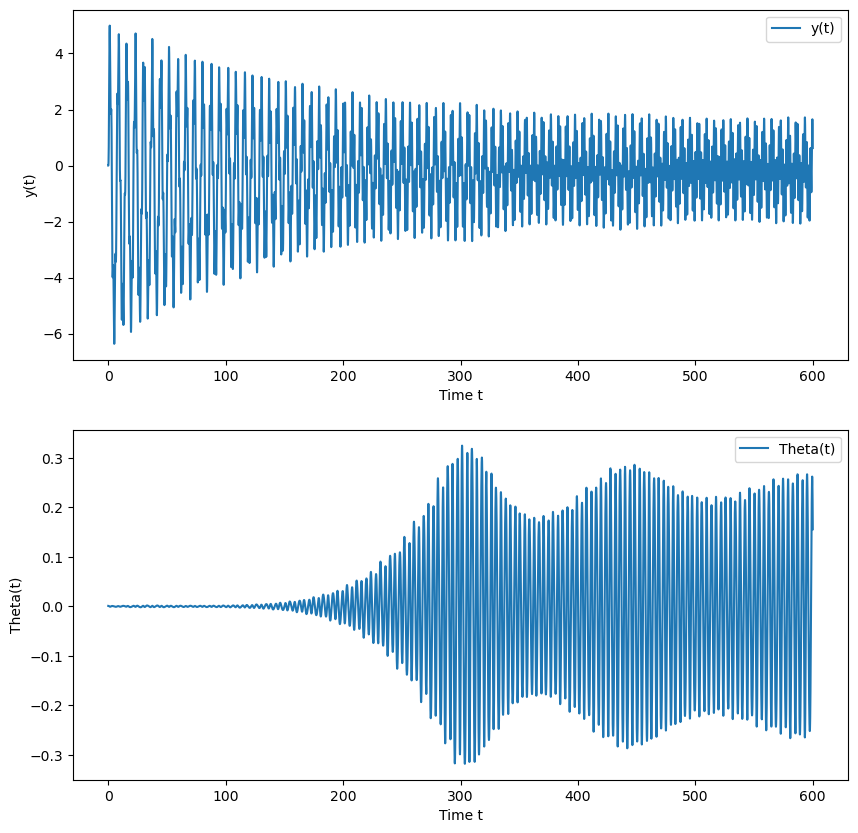

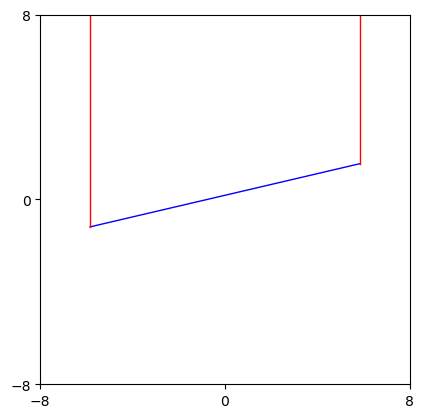

In [182]:
# Run the function on the more time interval
inter = [0, 3000]
ic = [0, 0, 0.001, 0]
n = 50000
p = 10000
W = 80
tacoma_plot(inter, ic, n, p, W,ydot,Trapezoid_method_step)

### Observation:

Vertical oscillation and angular oscillation is increasing not reaching a steady state.

### Vertical oscillation and angular oscillation at wind speed 80 KPH with a damping coefficient of 0.02 with same parametrs 

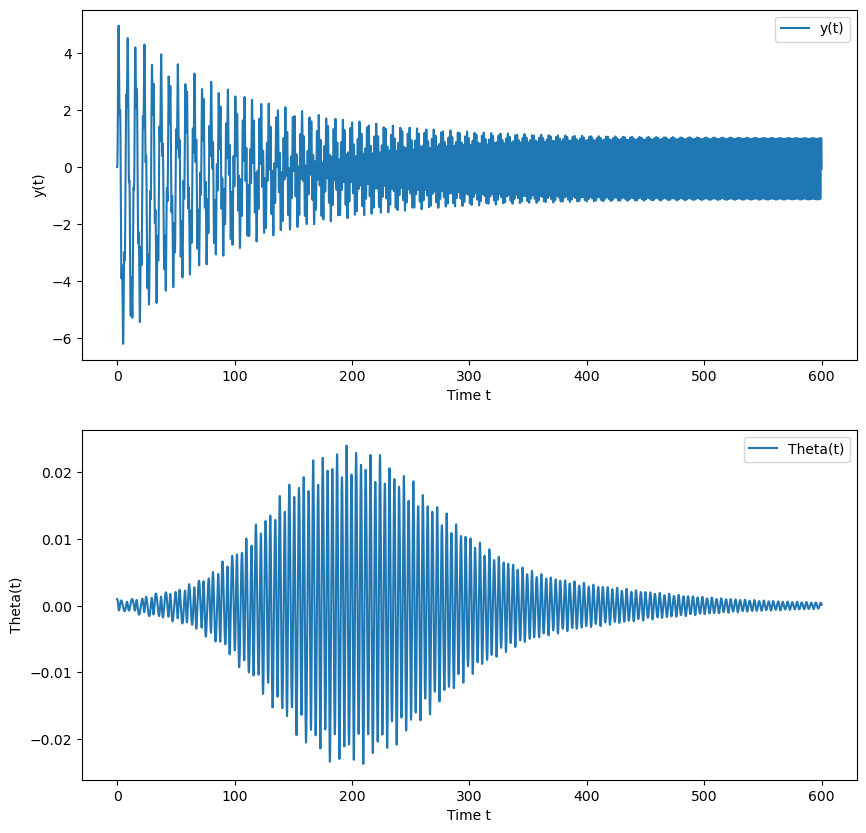

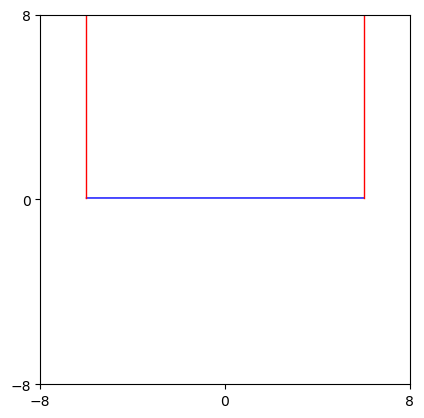

In [183]:
# Run the function on same parameters but with new ydot function with double damping coefficient
inter = [0, 3000]
ic = [0, 0, 0.001, 0]
n = 50000
p = 10000
W = 80
tacoma_plot(inter, ic, n, p, W,ydot_new,Trapezoid_method_step)

## Observation :

- From the above graph, it is evident that damping plays a crucial role in ensuring the stability of the bridge. When the damping coefficient is not increased, and with parameters like wind speed of 80km/hour, initial angles of 0.001 radians, and time interval [0,3000], the bridge shakes, and from the plot, it is clear that the angular displacement and oscillation increase over time, eventually leading to collapse.

- Also we observe that previously when using less damping coefficeint the bridge collapse after certain time interval, after doubling the damping coefficients the bridge last twice as long.

- However, when the damping is increased, the graph shows that for the same parameters and time interval, the bridge sustains the wind, vertical displacement, and oscillation and eventually becomes stable. This emphasizes the importance of increasing the damping coefficient to ensure the stability of the bridge and prevent collapse.

Hence we can say that increasing the damping coefficient in the bridge system helps to dissipate the energy of the oscillations, which leads to a reduction in the amplitude of the oscillations over time. In practical terms, this means that increasing the damping coefficient can help to make the bridge system more stable and less susceptible to damage from external forces like wind. 

## 7.1 Double the current value and find the change in the critical wind speed $W$

### Solution Approach

- To solve the problem, we modified the original differential equation function from the Tacoma bridge example by doubling the damping coefficient.

- We then used the previously defined function to find the minimum wind speed that does not let the magnification factor exceed 100.

### Critical wind speed with damping 0.01 that is solved earlier

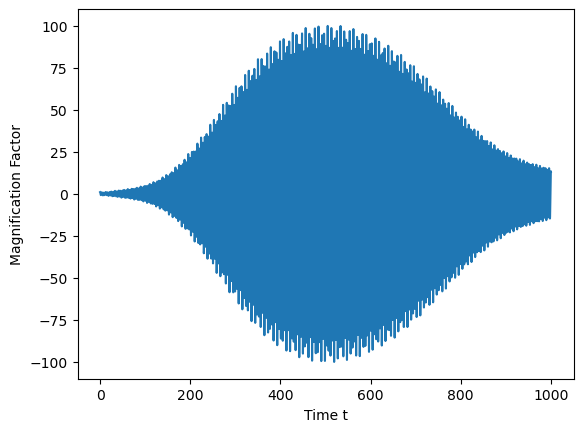

Minimum windspeed: 59.010887145996094 km/hr
Max Ratio at minimum windspeed: 100.0010066957524


In [184]:
# callng the fcntion find_min_windspeed_bisec that we defined earlier for calculating minimum windspeed for Magnification factor to go above 100
inter = [0, 5000] # Range of integration
ic = np.array([0, 0, 1e-3, 0]) # Initial conditions
n = 50000  
p = 10000 # Number of segments in the beam
ydot # Vertical velocity of the deck
 # Time step for the RK4 method
tol = 0.5e-03 # Tolerance for the bisection method


min_windspeed, max_theta = find_min_windspeed_bisec(inter, ic, n, p, ydot, rk4_step, tol=0.5e-03)
print("Minimum windspeed:", min_windspeed, "km/hr")
print("Max Ratio at minimum windspeed:", max_theta)

### Critical wind speed with double damping 0.02 

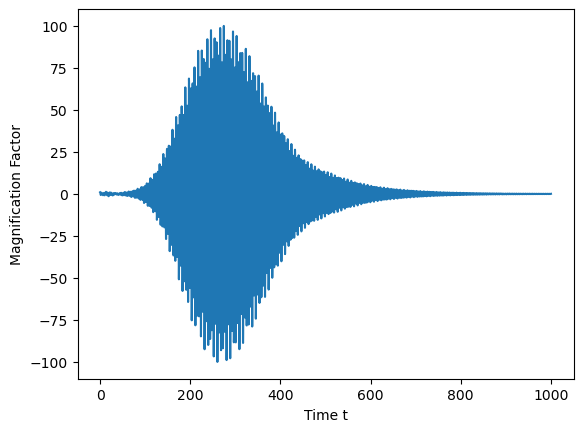

Minimum windspeed: 105.62381744384766 km/hr
Max Ratio at minimum windspeed: 99.99616768840396


In [185]:
# we use the new ydot_new fucntion we defined to account for increase in damping
# callng the fcntion that we defined earlier for calculating minimum windspeed for Magnification factor to go above 100
inter = [0, 5000] # Range of integration
ic = np.array([0, 0, 1e-3, 0]) # Initial conditions
n = 50000  
p = 10000 # Number of segments in the beam
ydot # Vertical velocity of the deck
 # Time step for the RK4 method
tol = 0.5e-03 # Tolerance for the bisection method


min_windspeed, max_theta = find_min_windspeed_bisec(inter, ic, n, p, ydot_new, rk4_step, tol=0.5e-03)
print("Minimum windspeed:", min_windspeed, "km/hr")
print("Max Ratio at minimum windspeed:", max_theta)


### Now, we will use the minimum windspeed obtained from the previous function and implement it in another function that we defined earlier. This function will plot the magnification factor against the exact windspeed that we obtained earlier.

In [186]:
inter = [0, 5000] 
ic = [0, 0, 0.001, 0]  # Initial conditions: theta==0.00001
n = 50000  
p = 10000  
W = 105.6238174  # Wind speed

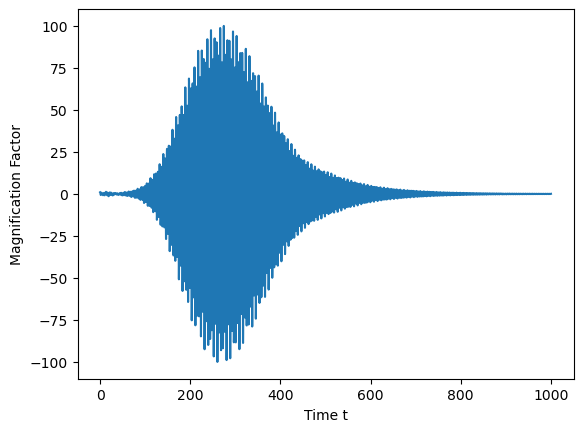

Max Theta: 0.09999616654240506
Ratio: 99.99616654240506


In [187]:
# Call the tacoma_plot_ratio function to obtain the values of theta and the ratio
y_values, ratio = tacoma_plot_ratio(inter, ic, n, p, W, ydot_new, rk4_step)
# Print the maximum value of theta and the ratio
print('Max Theta:', np.max(y_values[:, 1]))
print('Ratio:', ratio)

## Observation:

- Upon increasing the damping coefficient from 0.01 to 0.02, we observed that the critical wind speed required to produce a magnification factor of at least 100 increased from 59.01 km/hr to 105.62 km/hr when using the RK4 method. This indicates that the bridge is now capable of withstanding stronger winds when the damping coefficient is increased

# 7.2 Can you suggest possible changes in design that might have made the bridge less susceptible to torsion?

Based on the research we did, one possible change in design that might have made the bridge less susceptible to torsion is increasing the torsional stiffness of the deck. The original Tacoma Narrows Bridge had a relatively low torsional stiffness due to its narrow and flexible deck, which allowed the wind to twist the bridge more easily.

A design with a stiffer deck, either by increasing its width or adding more longitudinal beams or trusses, could have reduced the torsional deflection caused by the wind. Additionally, increasing the __damping coefficient__ of the bridge could also have helped to increase its stability in high wind conditions. 

As we saw earlier, __doubling the damping coefficient__ significantly increased the critical wind speed that the bridge could withstand without reaching a magnification factor of 100. 

Therefore, the use of diagonal bracing or other forms of structural damping, such as tuned mass dampers, could have been implemented to reduce the torsional response to wind loading and increase the bridge's overall stability.

Based on our research to make the bridge more stable in __high winds__ with __vertical and angular oscillations__, several measures can be taken.

Increasing the vertical stiffness of the bridge can reduce vertical oscillations caused by wind loading. This can be achieved by using stronger materials, thicker members, or adding more vertical supports.

Secondly, improving the aerodynamics of the bridge can reduce the wind loadings that cause angular oscillations. This can be done by adjusting the shape of the bridge deck or adding wind deflectors or other aerodynamic devices to reduce the effects of wind turbulence.